## CASK FR1 Correct Rate

In [1]:
import sys
sys.path.insert(0, '../scripts')

import os
import numpy as np
from accuracy import plot_cumulative_accuracy, read_and_record, graph_single_stats
from path import fr1_female_path, fr1_female_sheets
from meals import process_meal_data
export_root = '../export/Figure 2/'
os.makedirs(export_root, exist_ok=True)
female_ending_corr = []
female_learned_time = []
female_acc_dict = {}
 
group_data = []

## Female Group

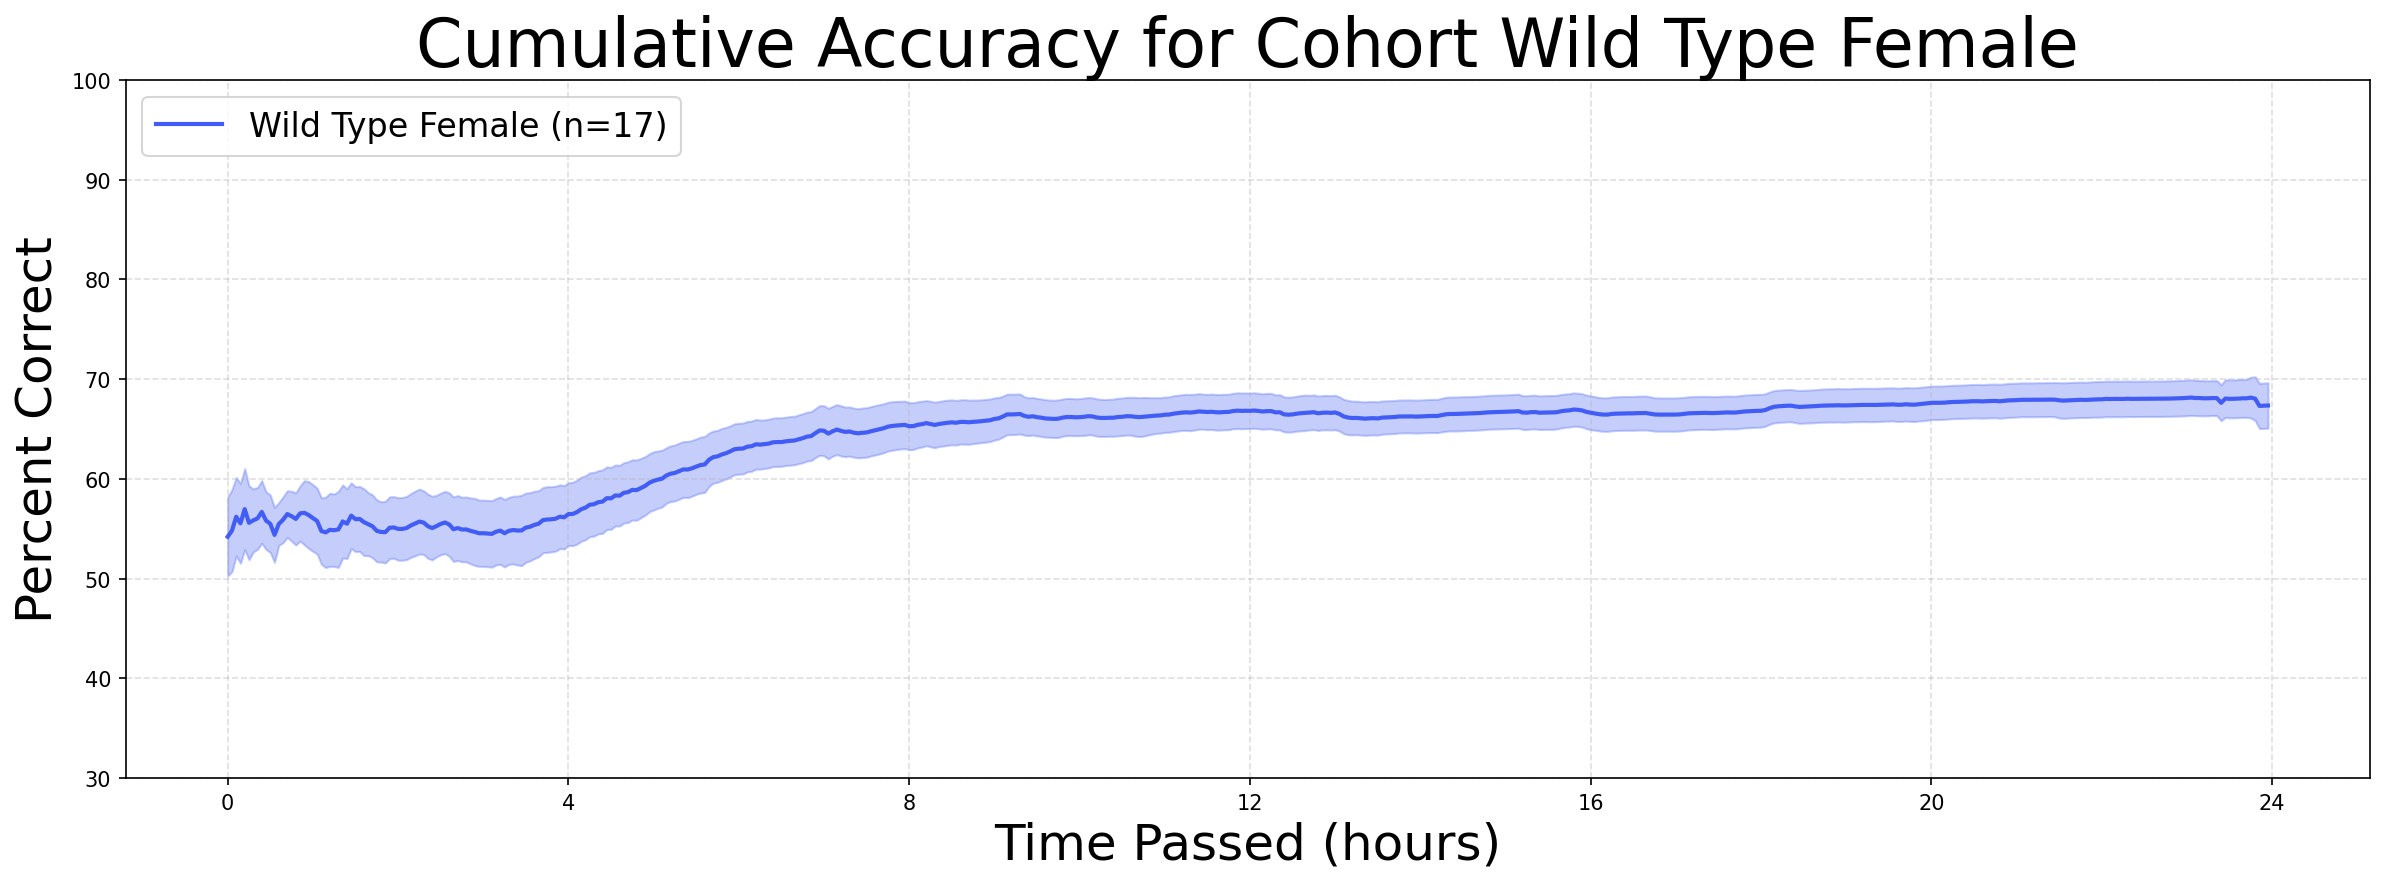

In [2]:
# R2M7 has false time signatures
group_data = []

for sheet in fr1_female_sheets:
    try:
        data = read_and_record(path=fr1_female_path, sheet=sheet, 
                            ending_corr=female_ending_corr, 
                            learned_time=female_learned_time,
                            acc_dict=female_acc_dict)
        group_data.append(data)
    except ValueError:
        continue
plot_cumulative_accuracy([group_data], ['Wild Type Female'], bin_size_sec=180,
                         export_path=os.path.join(export_root, f'Female_FR1_Accuracy.svg'))

### Analysis

#### Time need to reach 80% for 2 cont. hours

Female Size: 17
Female Average: 4.914
Female SE: 0.817


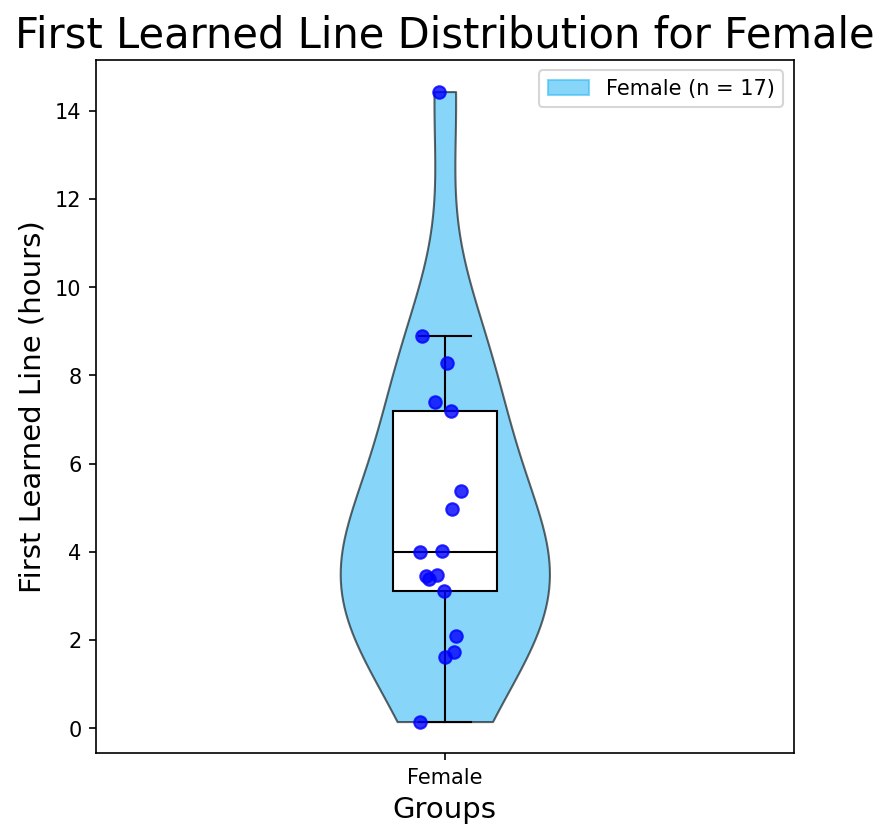

In [3]:
graph_single_stats(female_learned_time, group_name='Female', stats_name='First Learned Line', unit='hours', violin_width=0.3,
                  export_path=os.path.join(export_root, 'WT_FirstLearnedLine_barplot.svg'))

#### Ctrl/Cask Ending/Overall Correct Rate

Female Size: 17
Female Average: 68.413
Female SE: 1.803


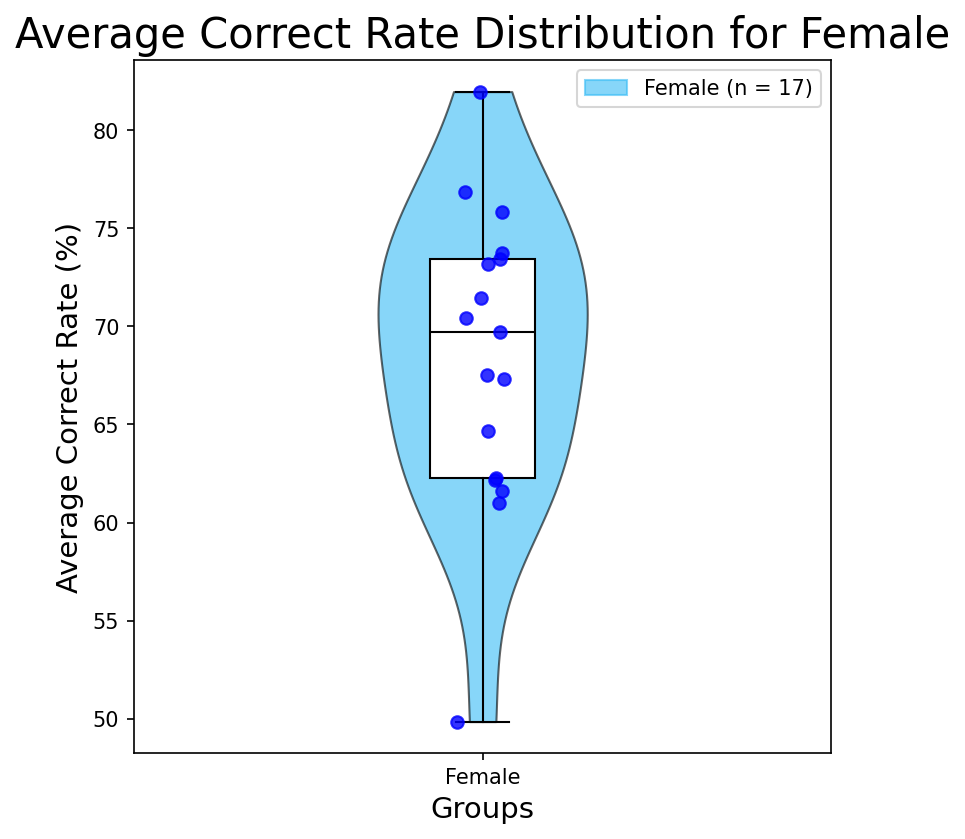

In [4]:
graph_single_stats(female_ending_corr, group_name='Female', stats_name='Average Correct Rate', unit='%', violin_width=0.3,
                  export_path=os.path.join(export_root, 'WT_accuracy_barplot.svg'))

### Wild-Type FR1 Meal Analysis

In [5]:
export_root = '../export/Figure 2/WT_FR1_Meal/'
os.makedirs(export_root, exist_ok=True)

female_avg_pellet = [] # pellet per hour
female_dark_meals = [] # percentage of meals in inactive/dark phase
female_fir_meal = []
female_fir_good_meal = []
flip_female_meal_count = []
female_in_meal_ratio = []

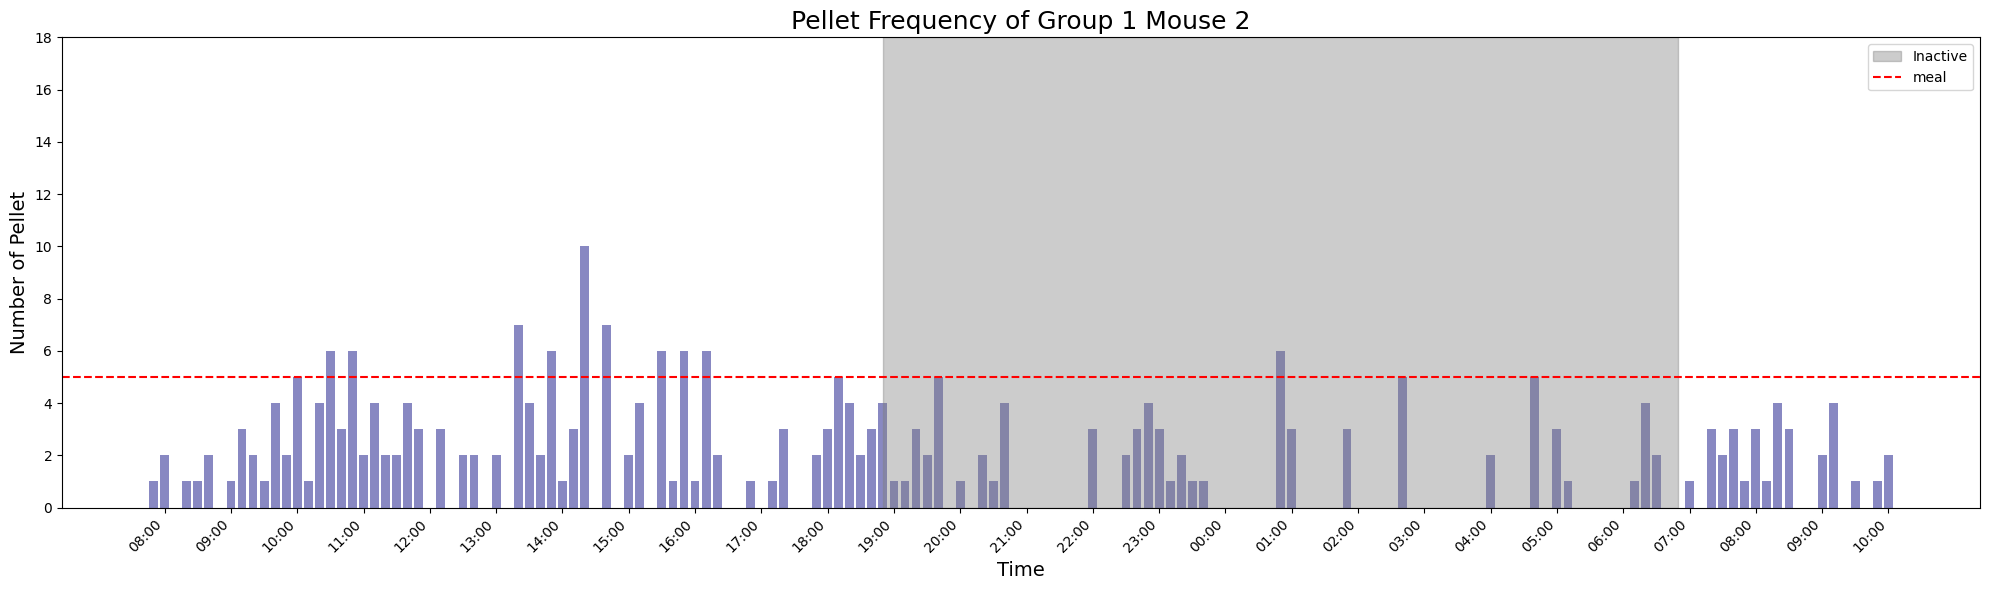

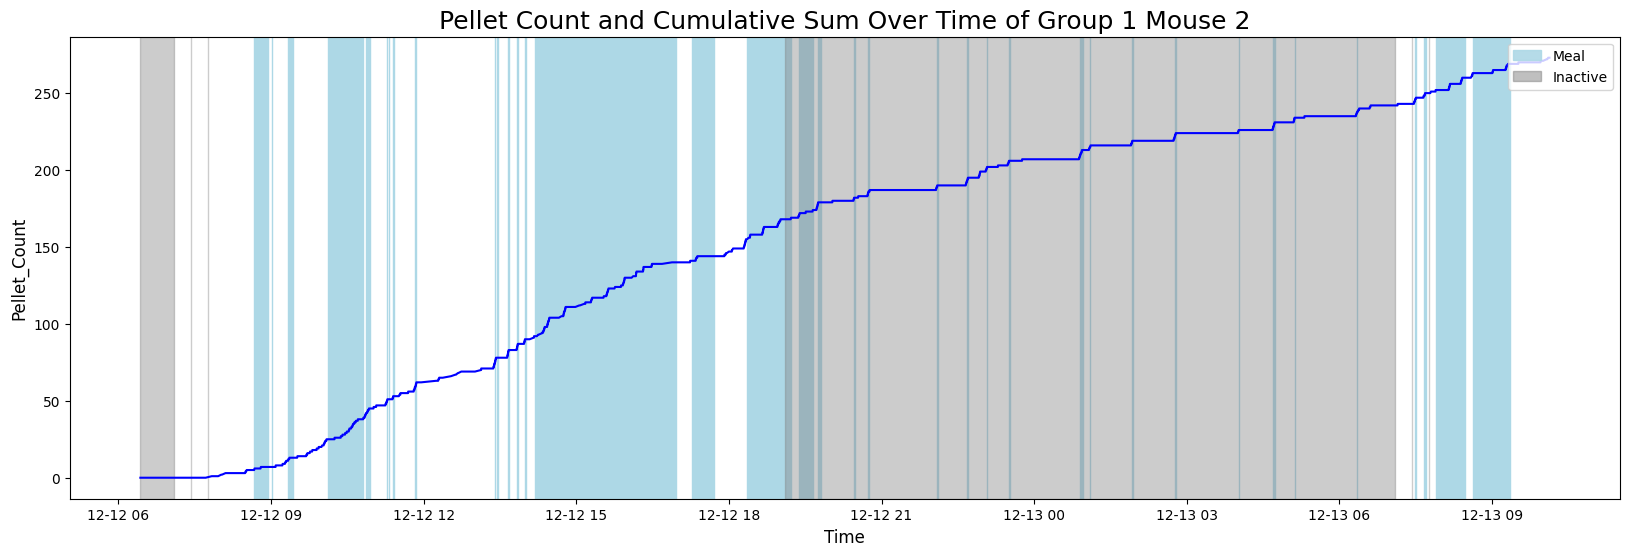

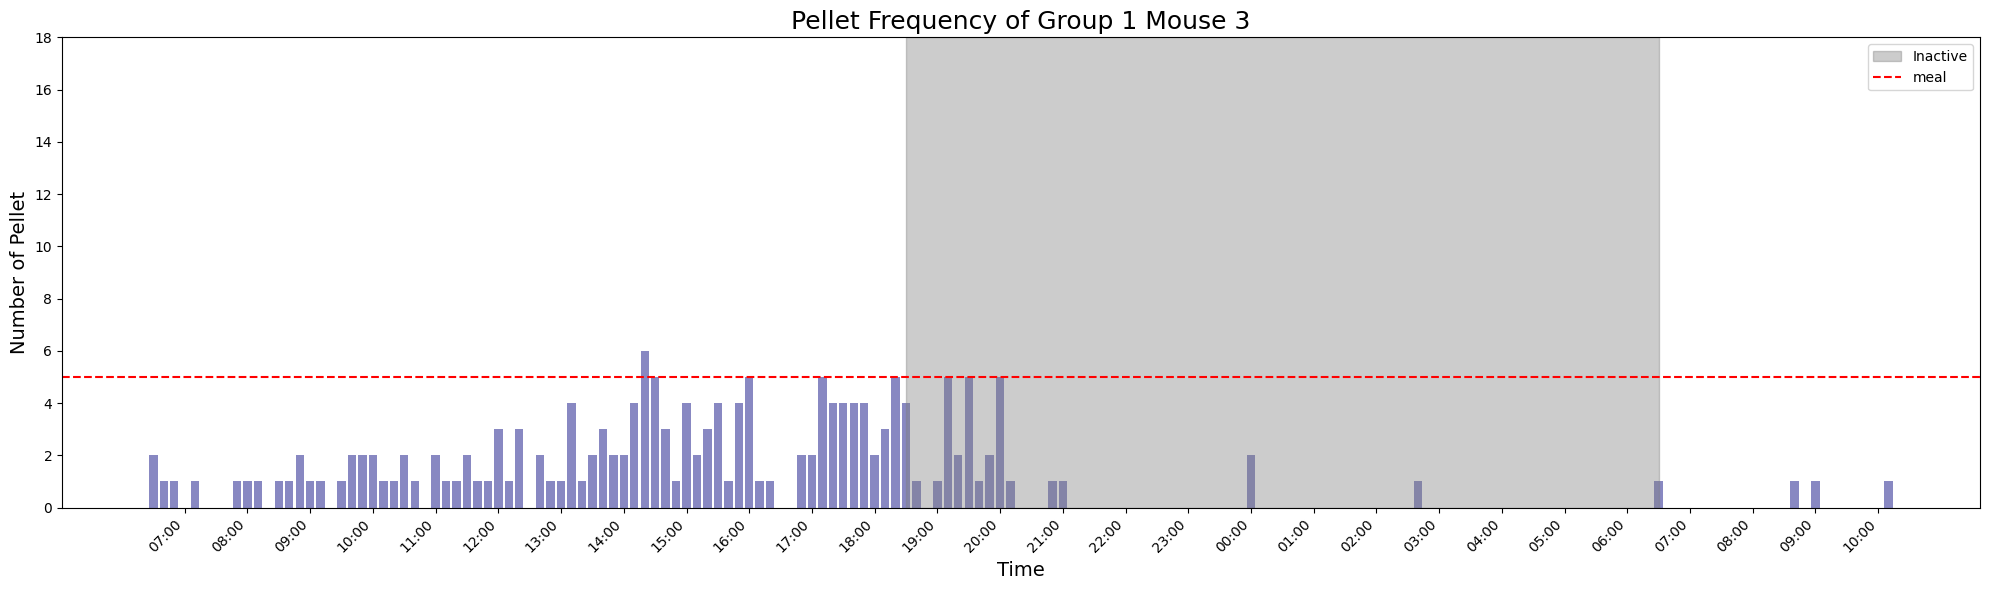

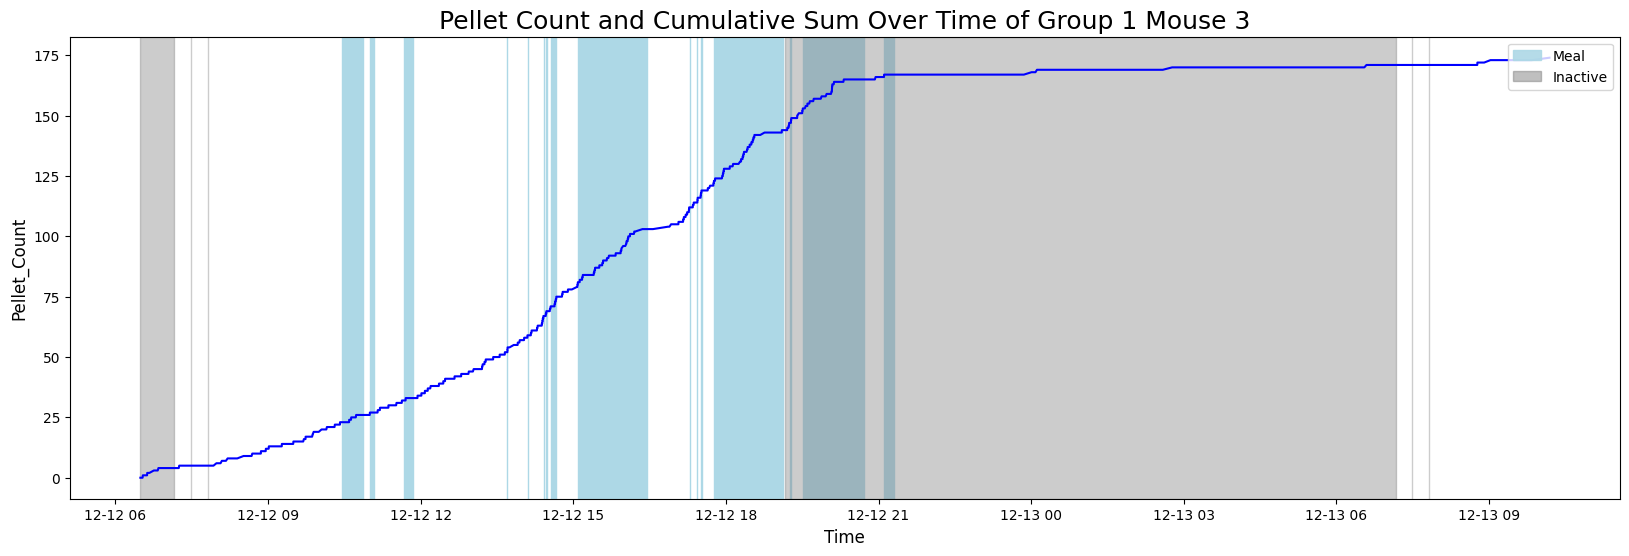

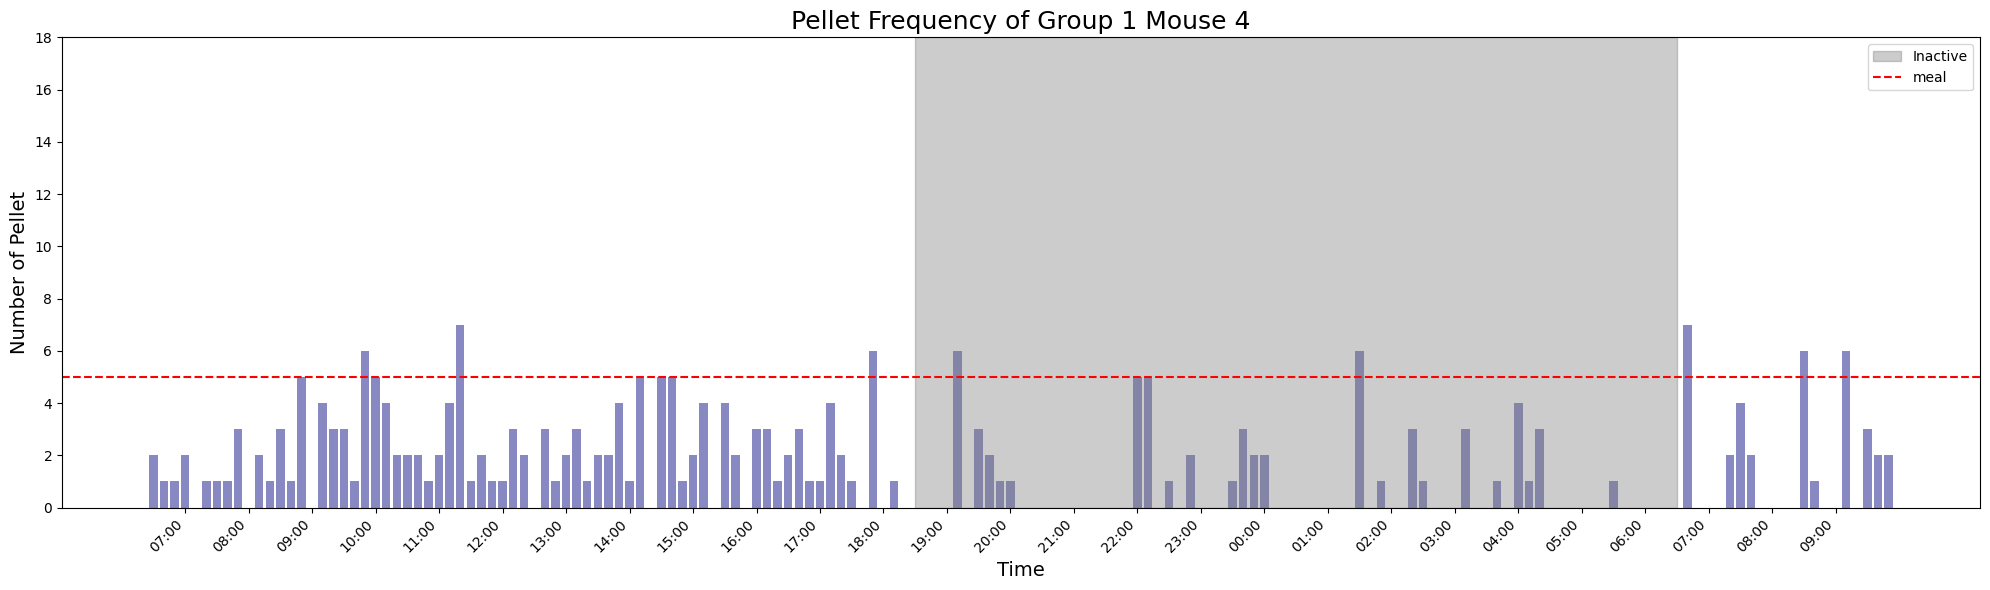

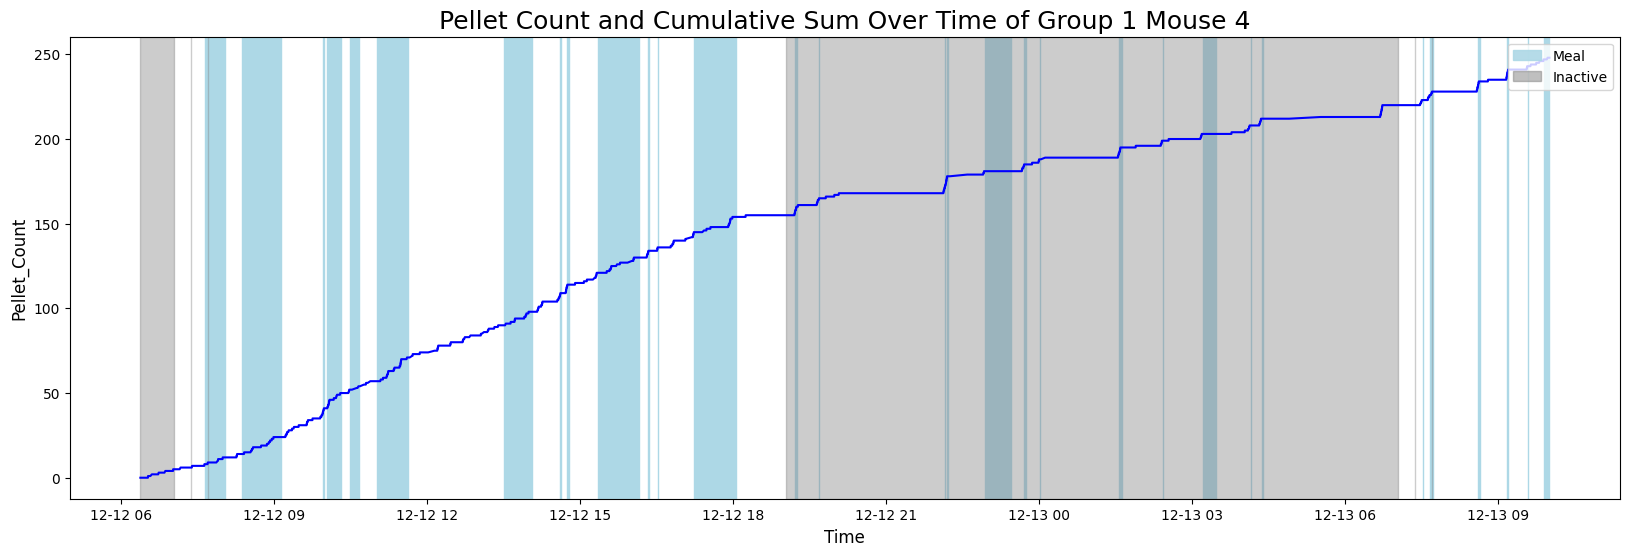

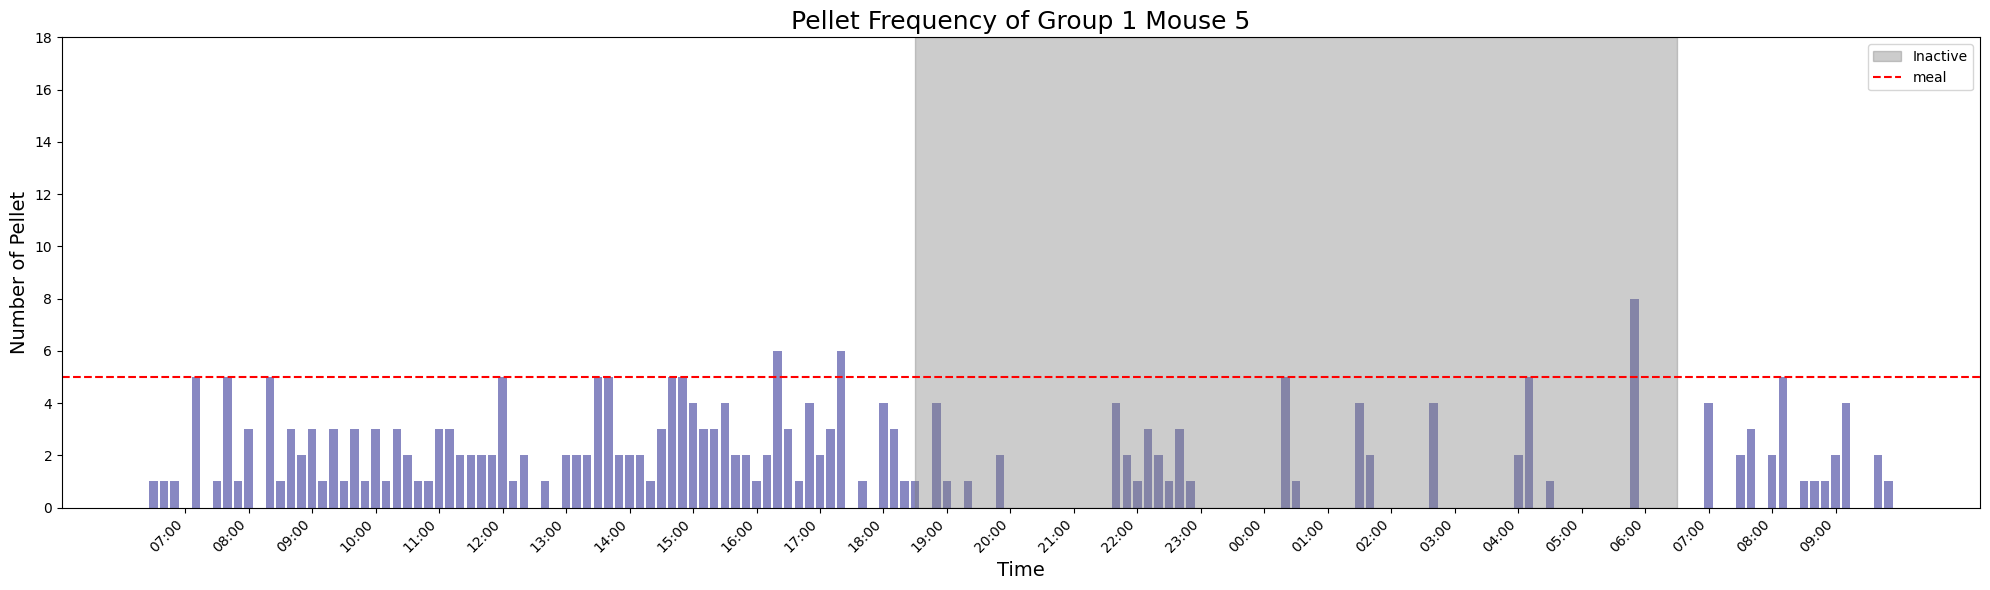

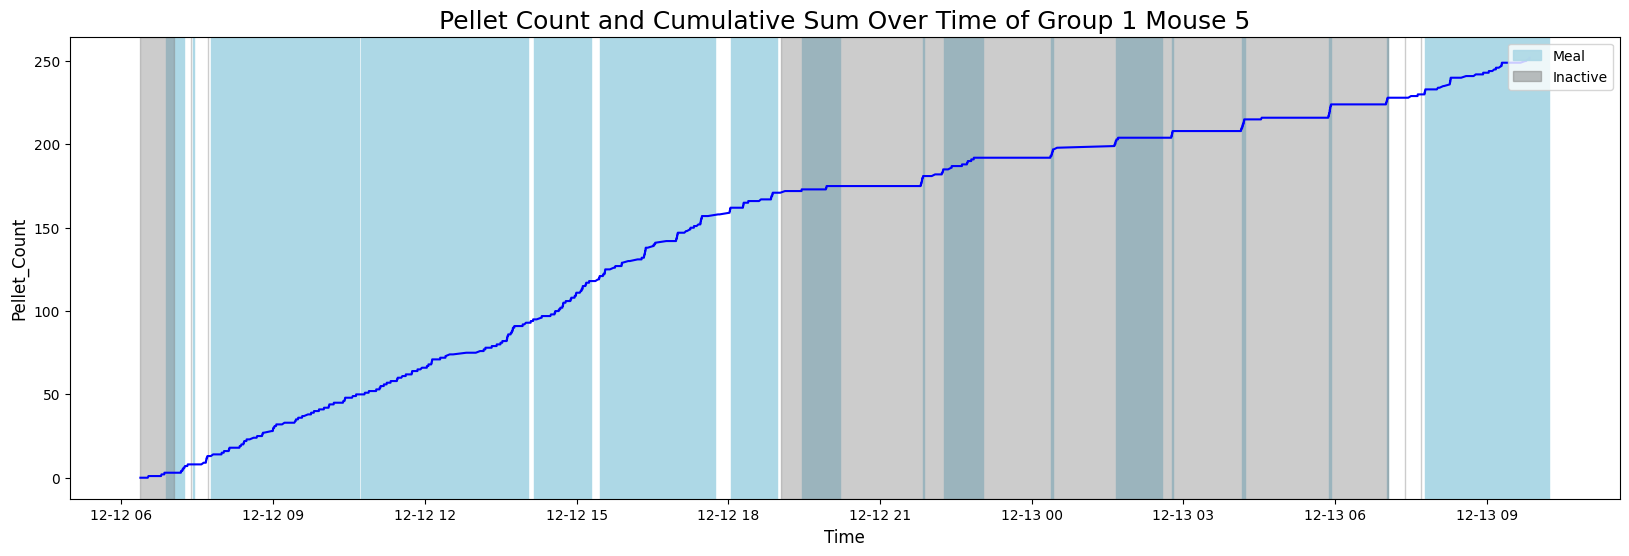

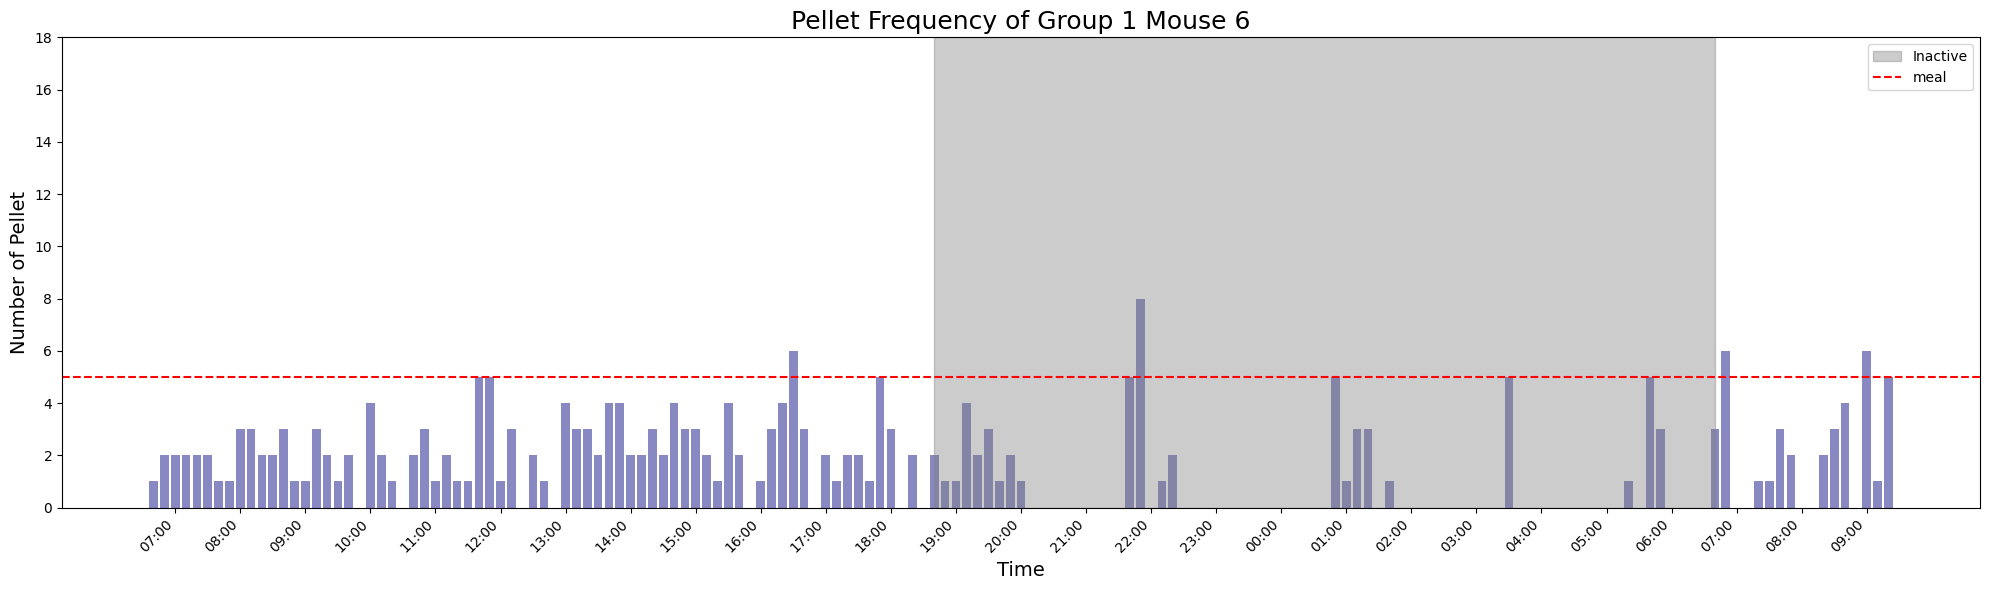

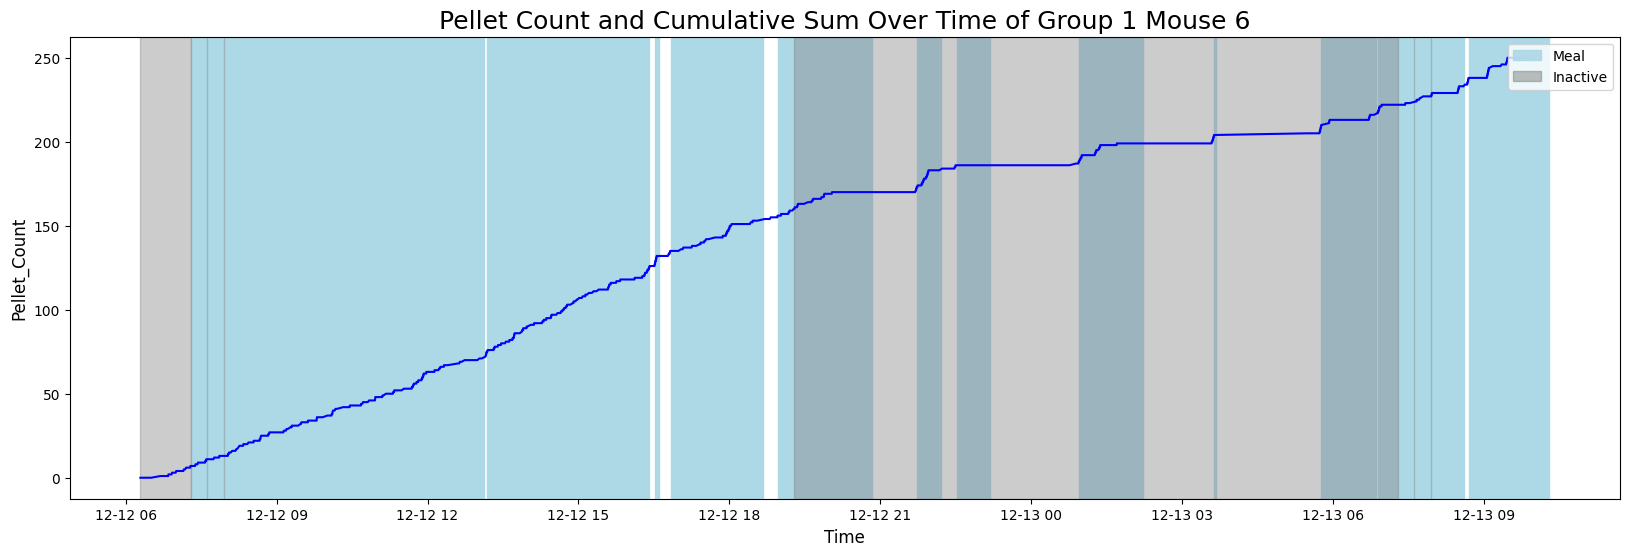

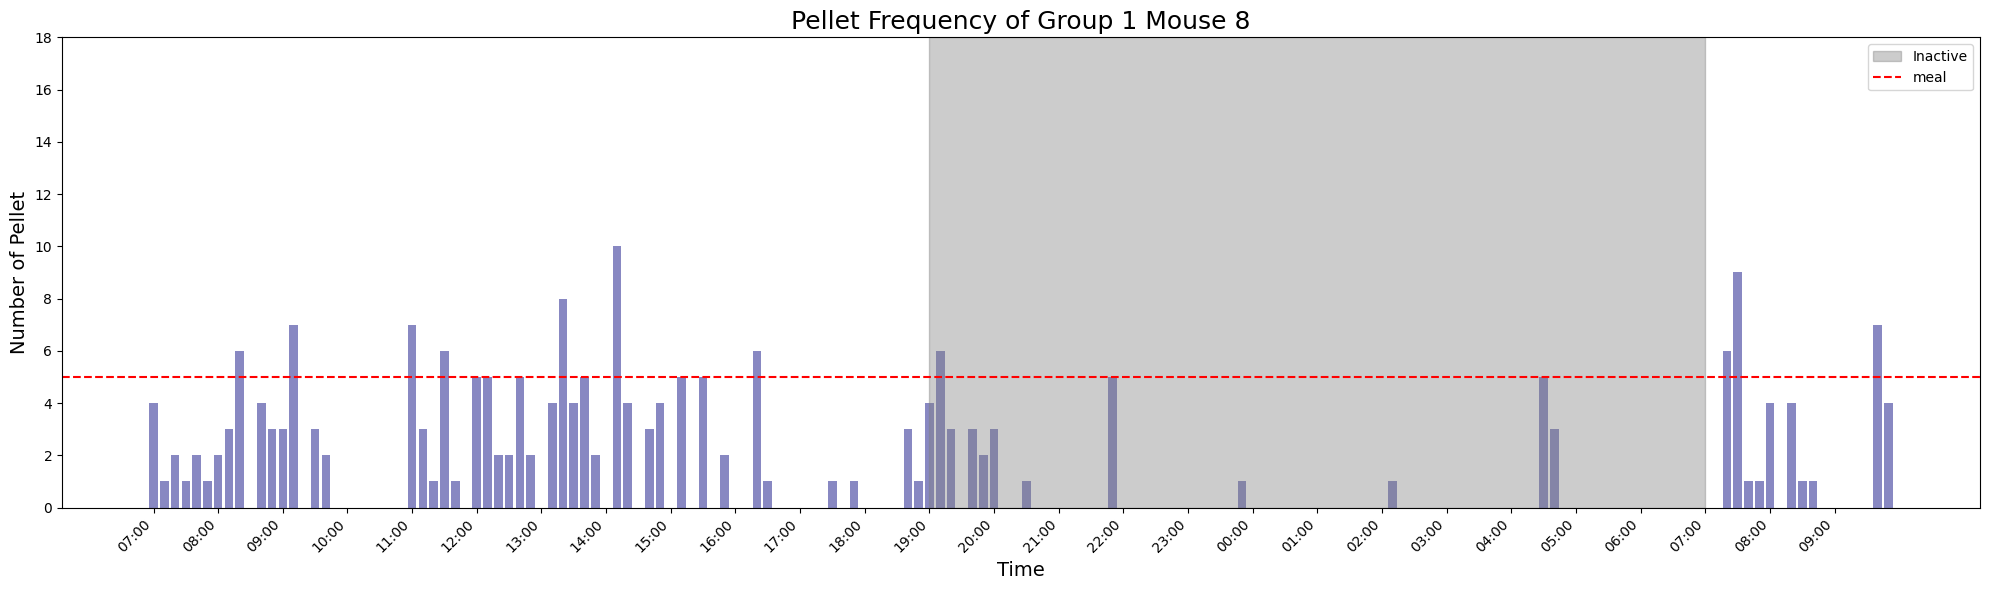

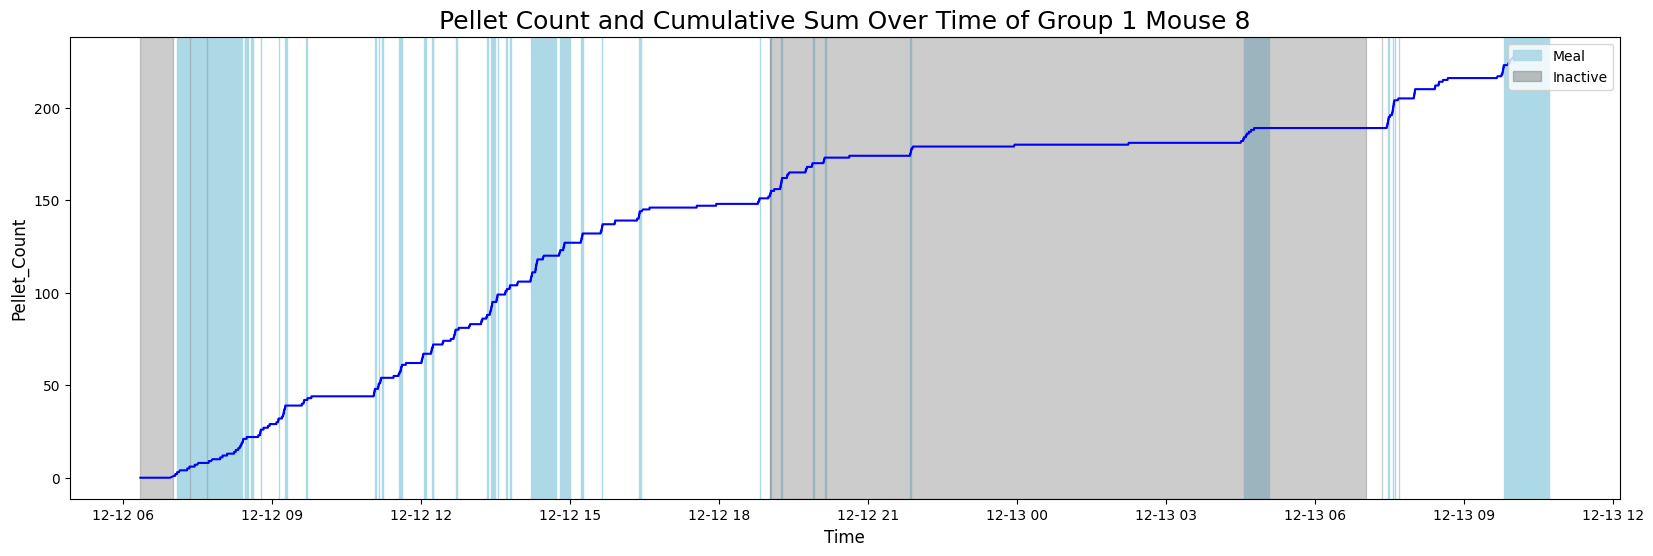

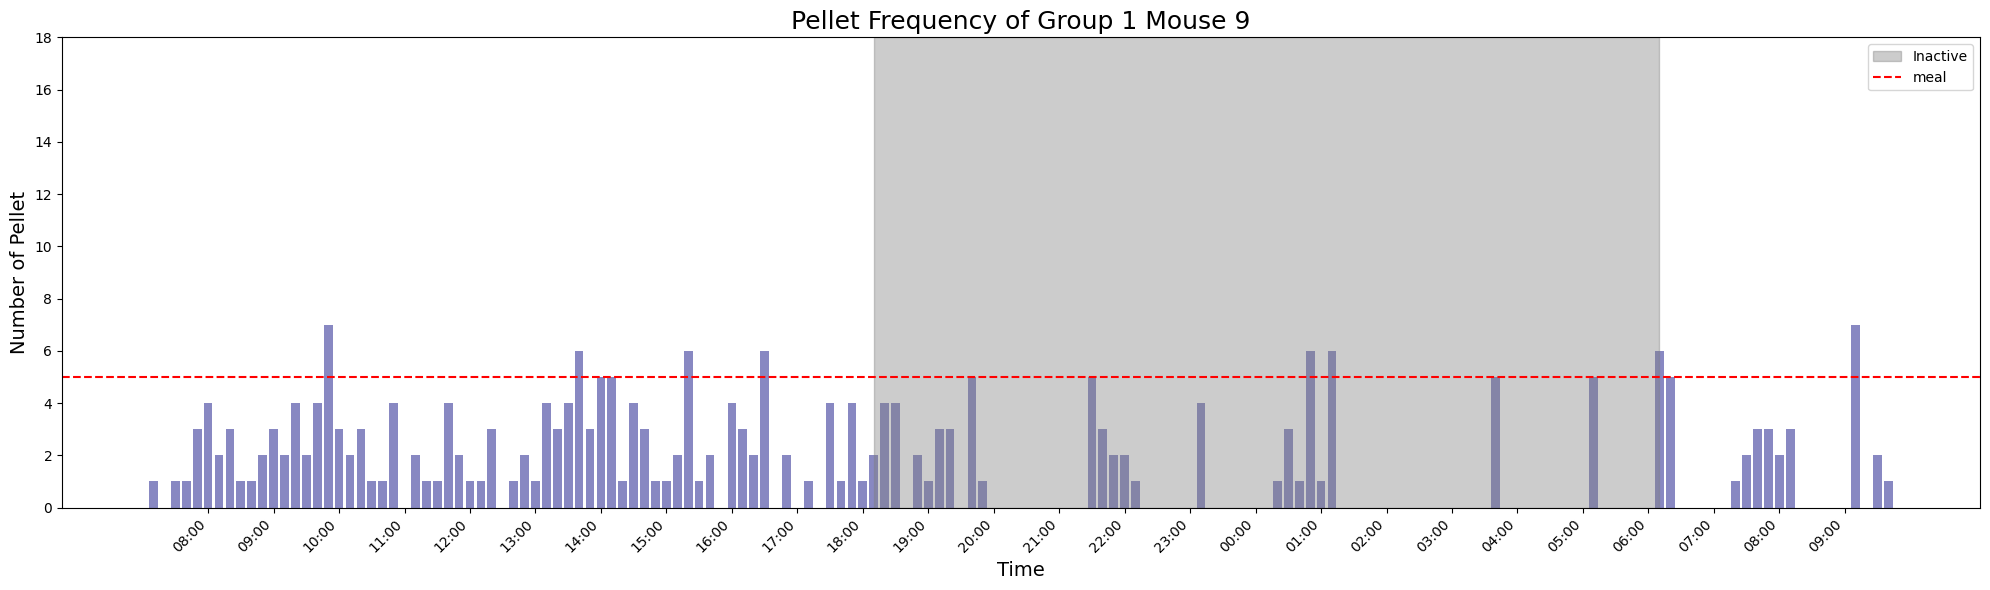

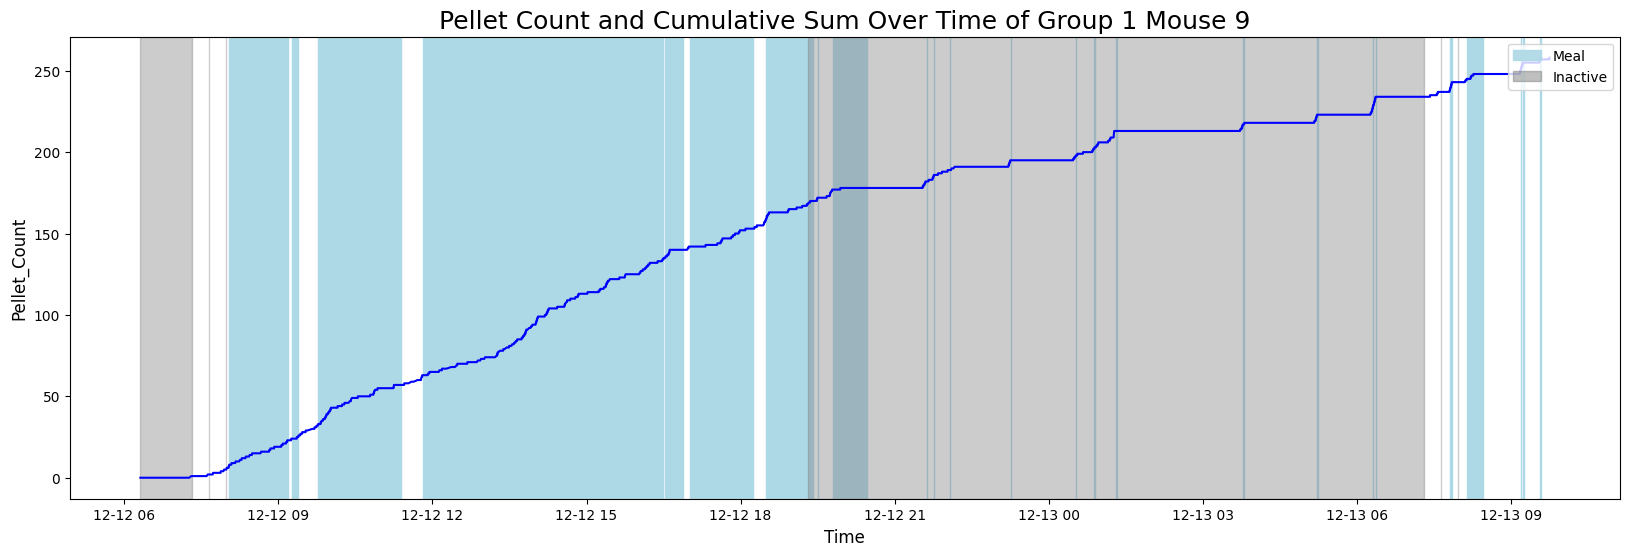

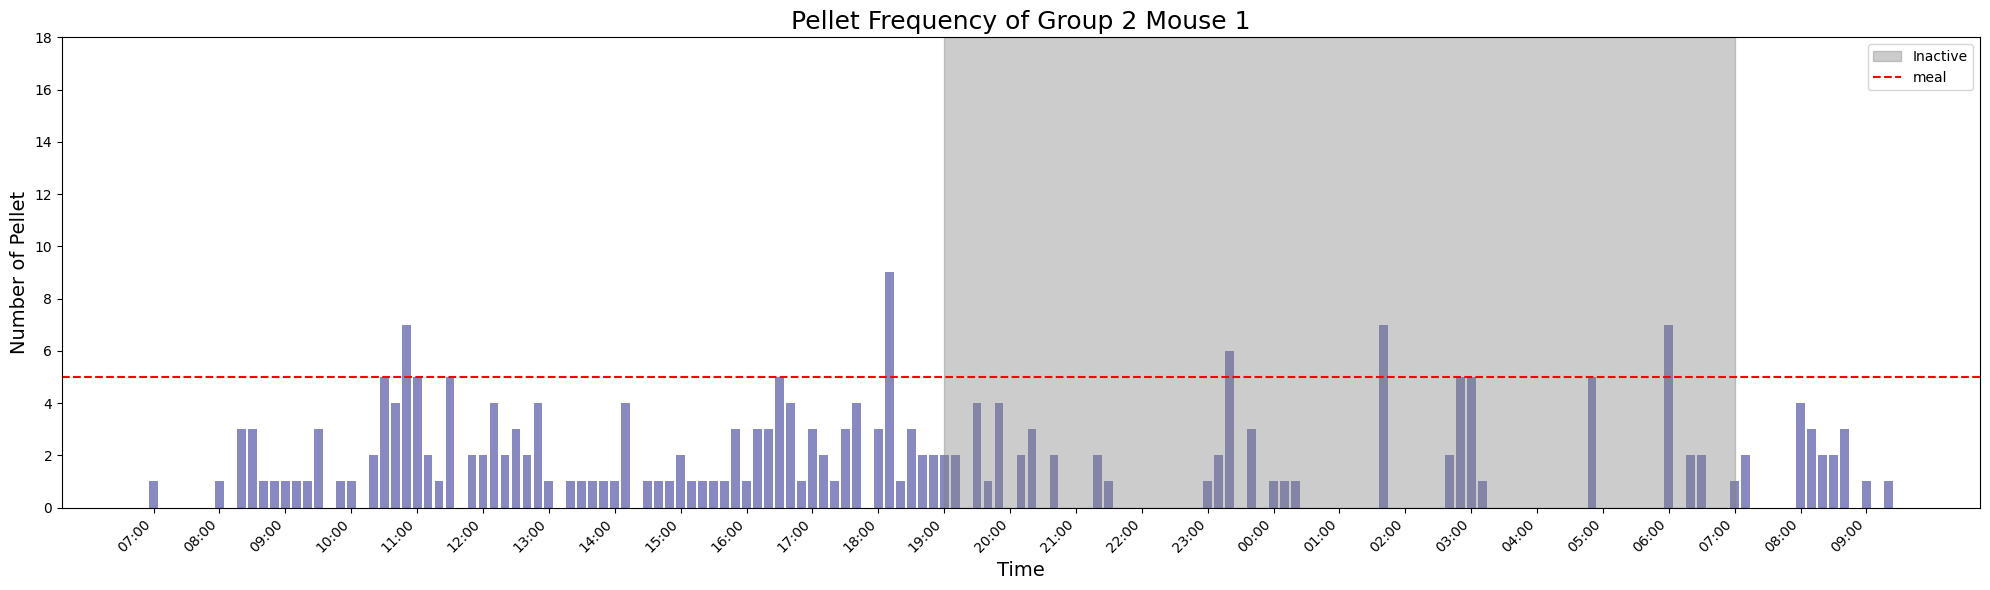

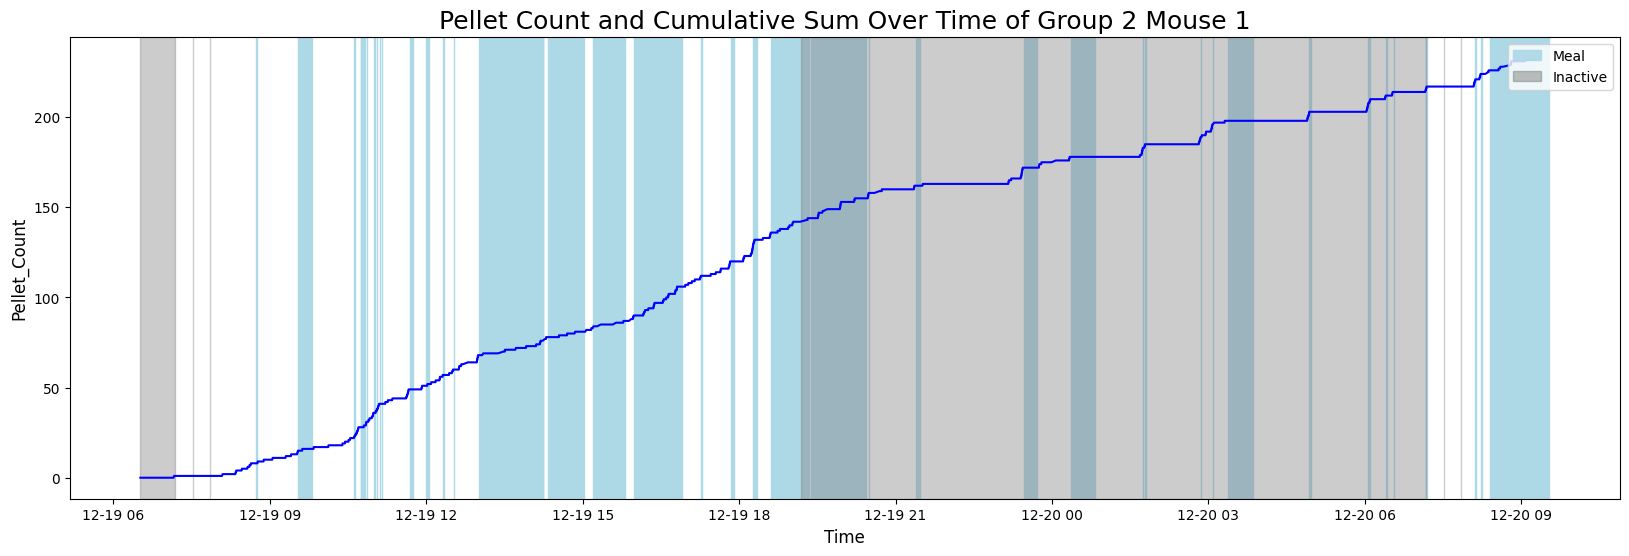

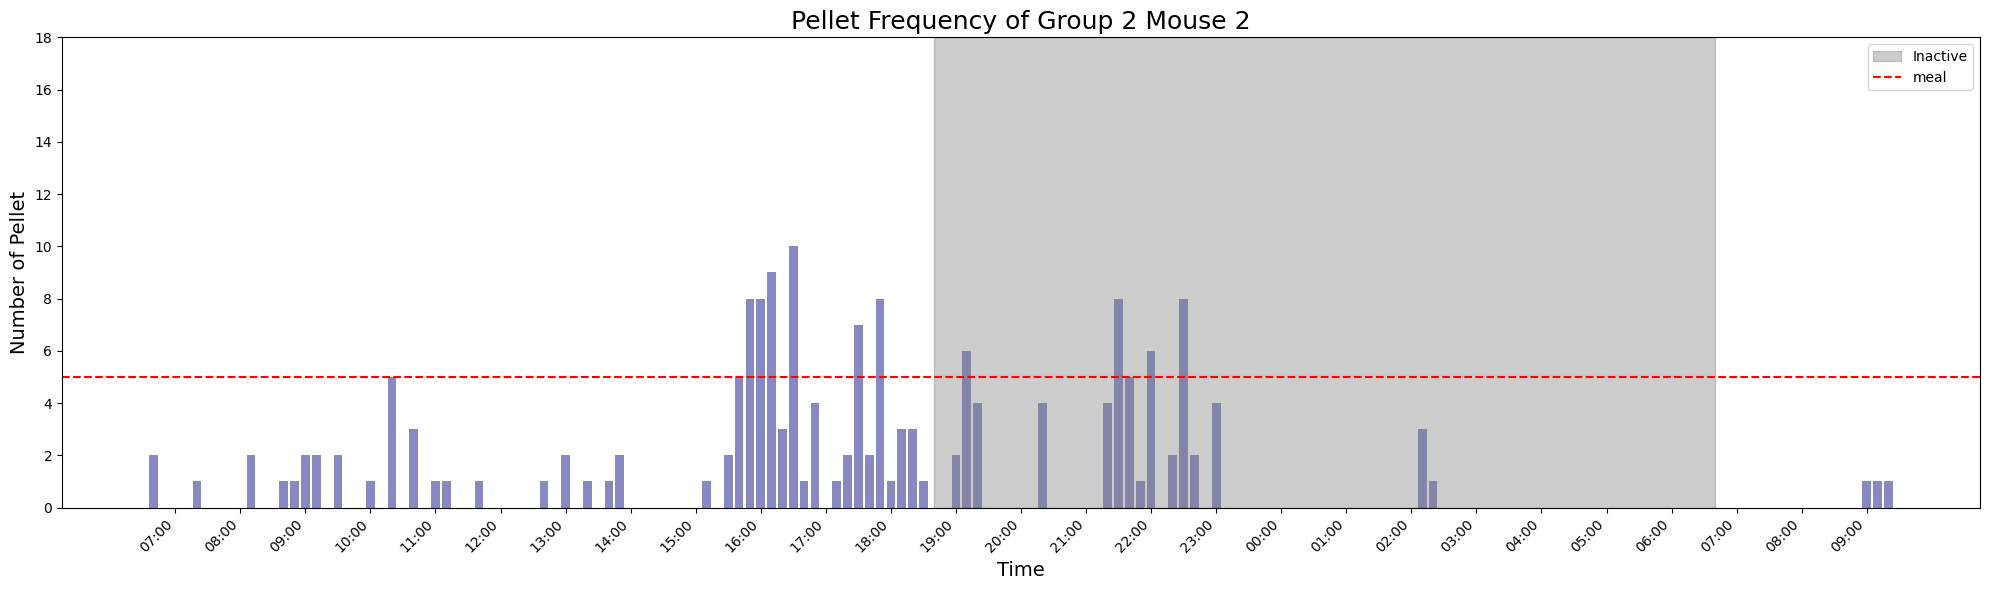

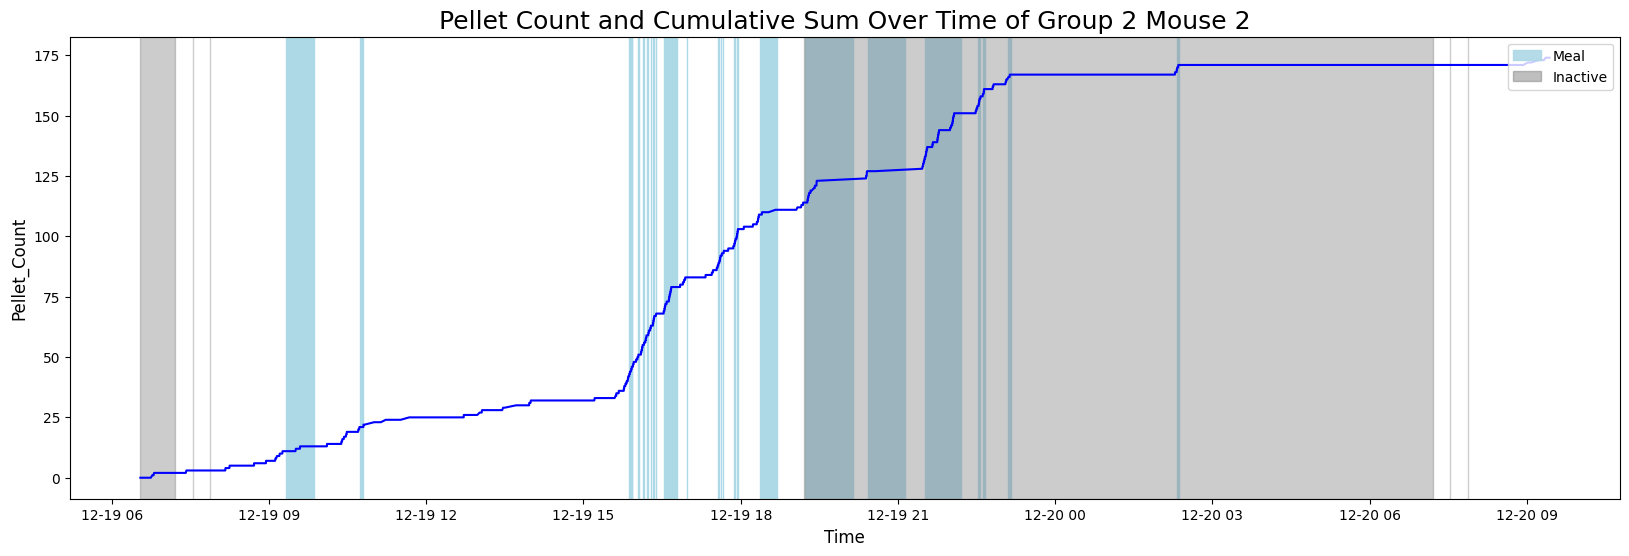

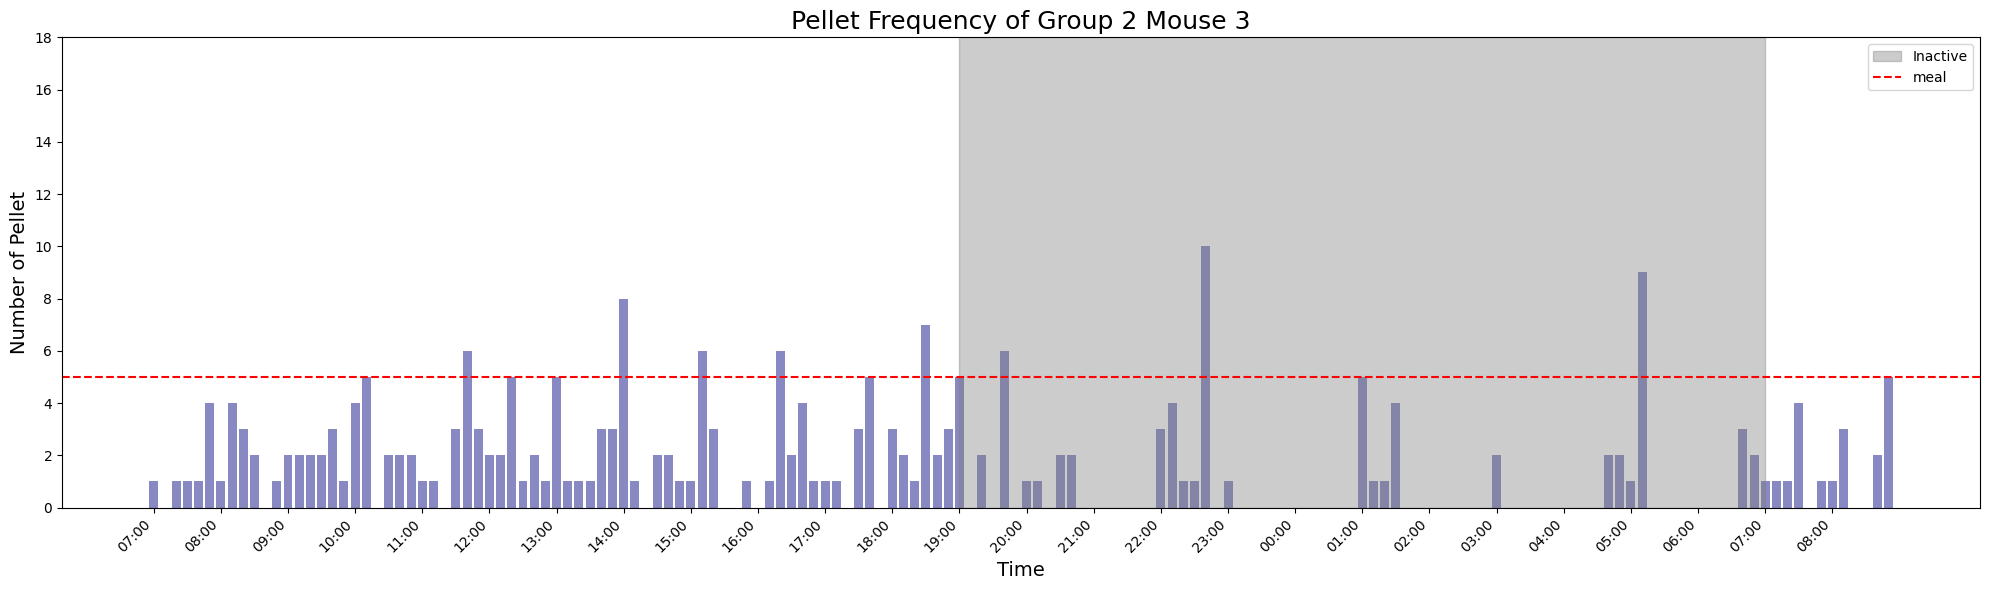

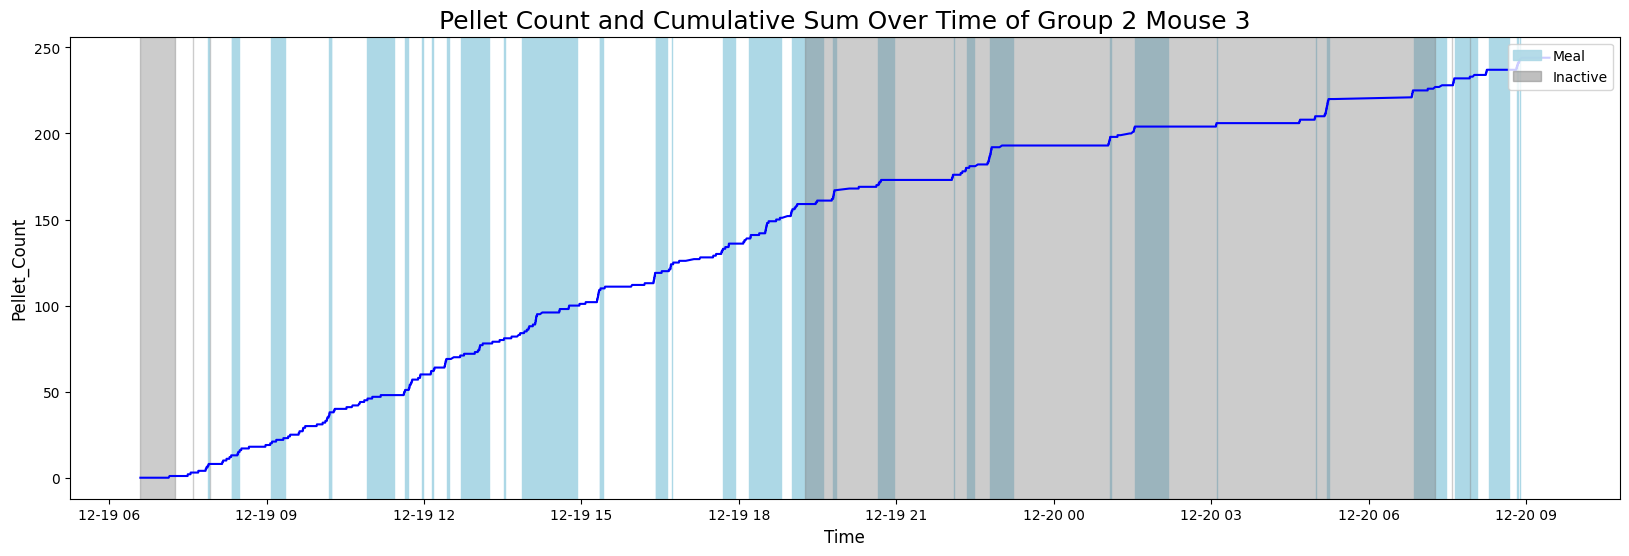

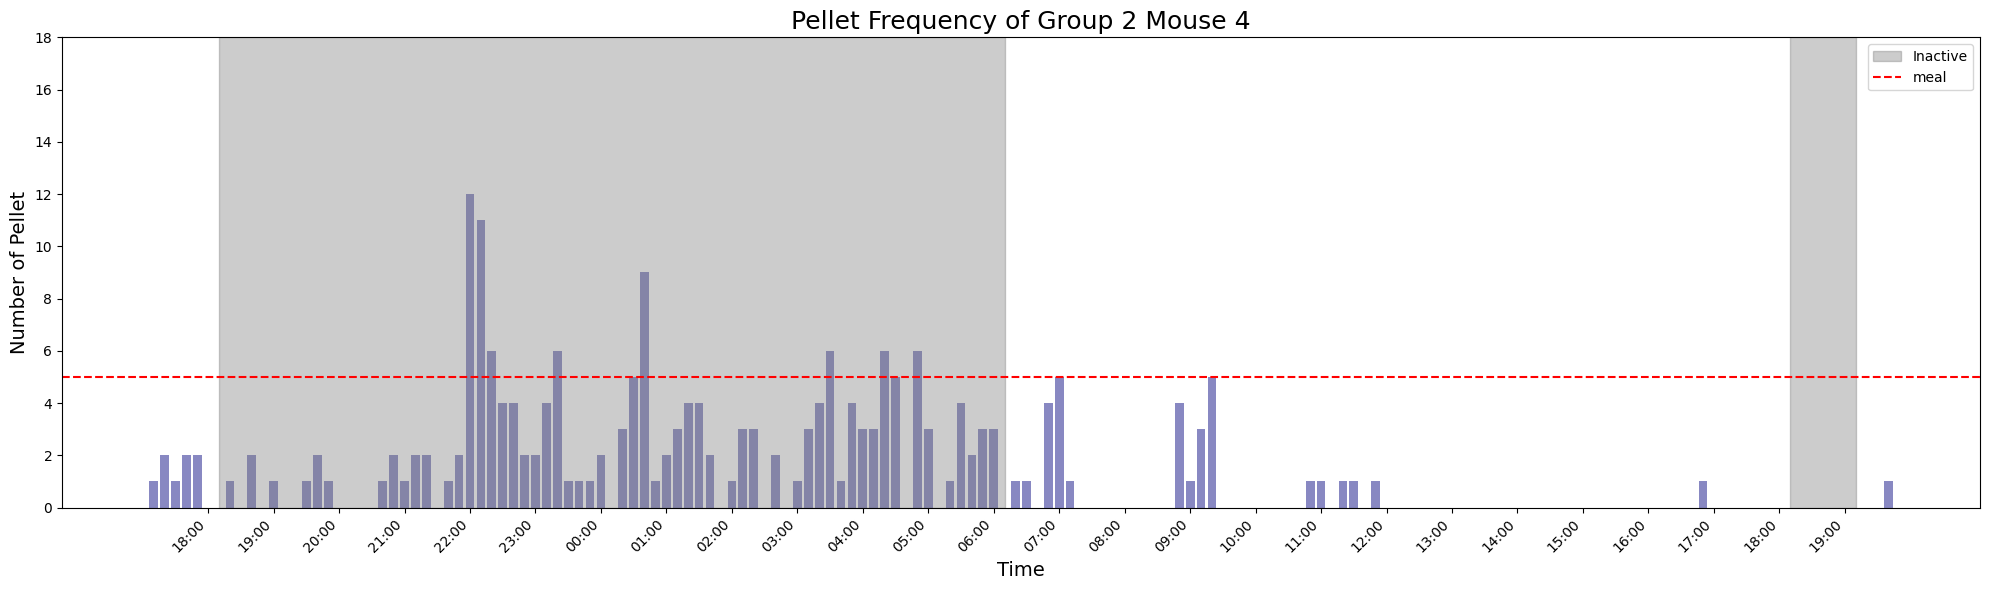

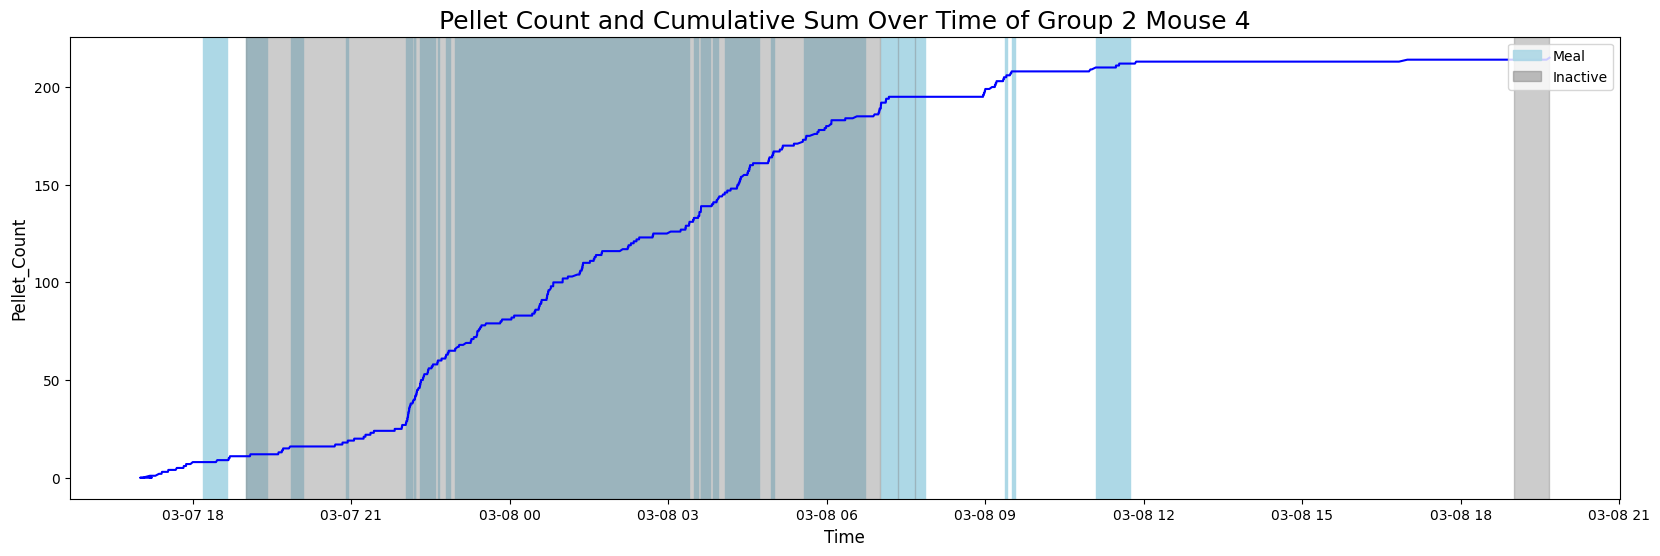

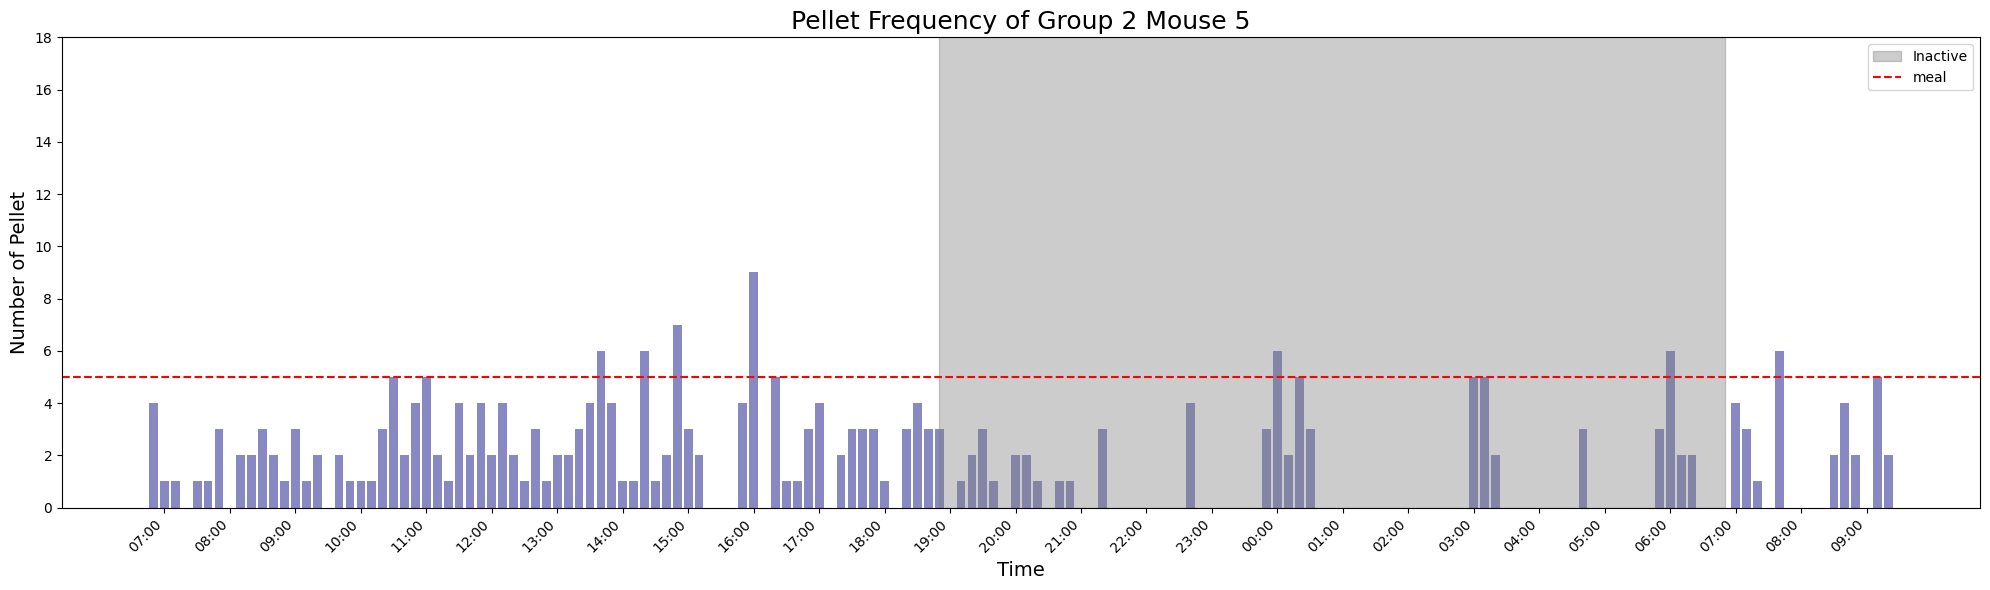

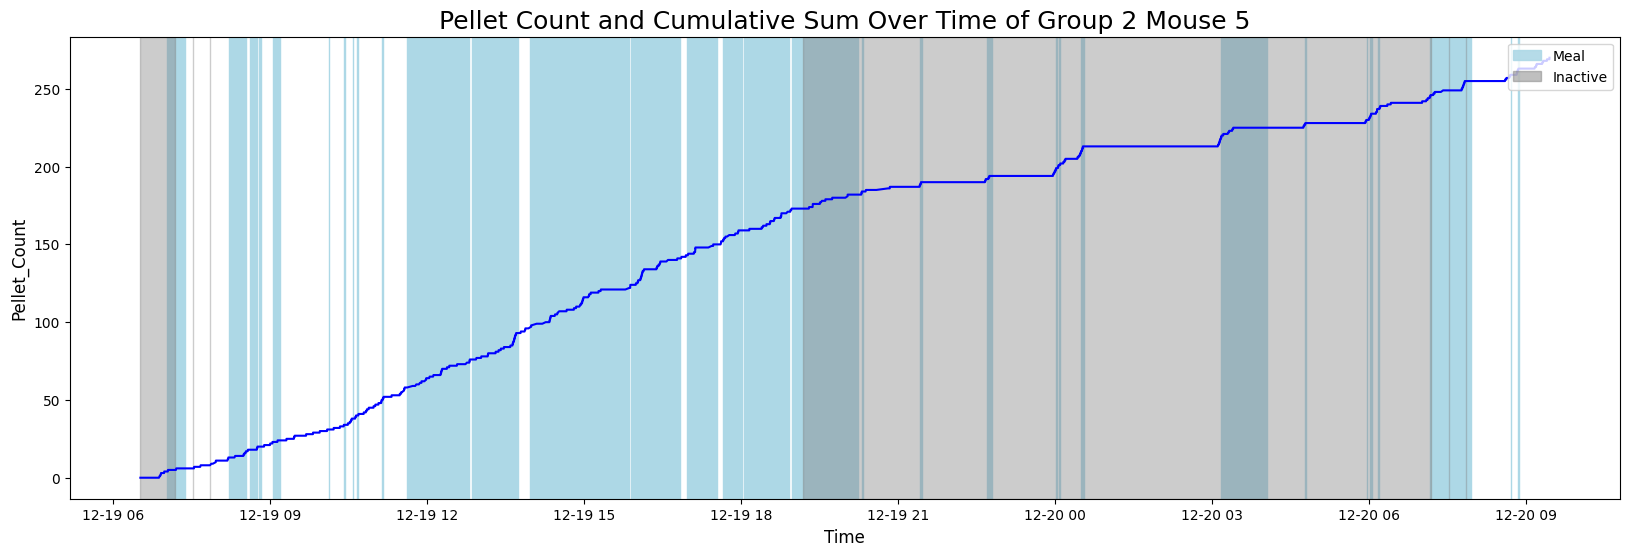

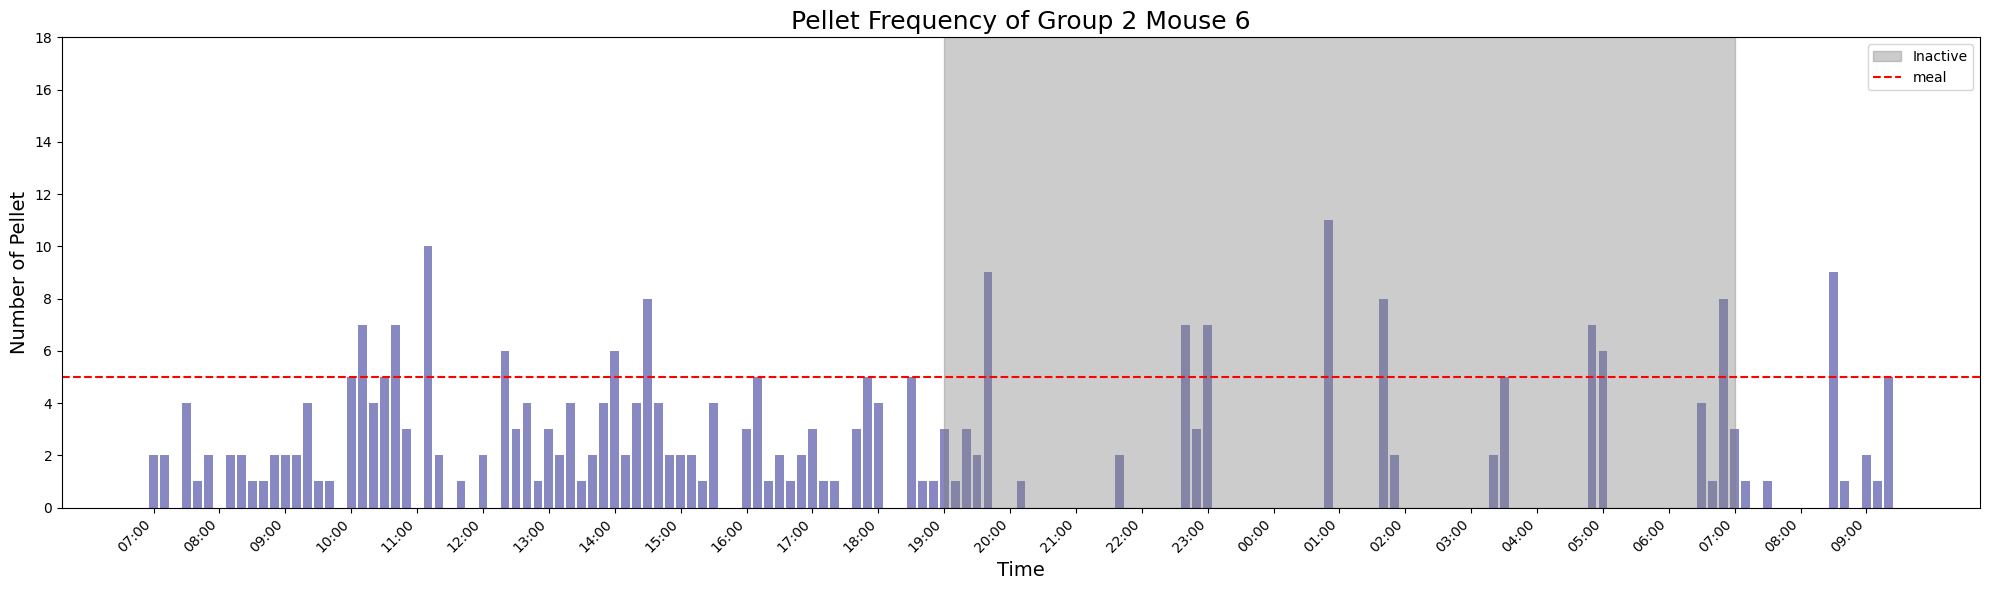

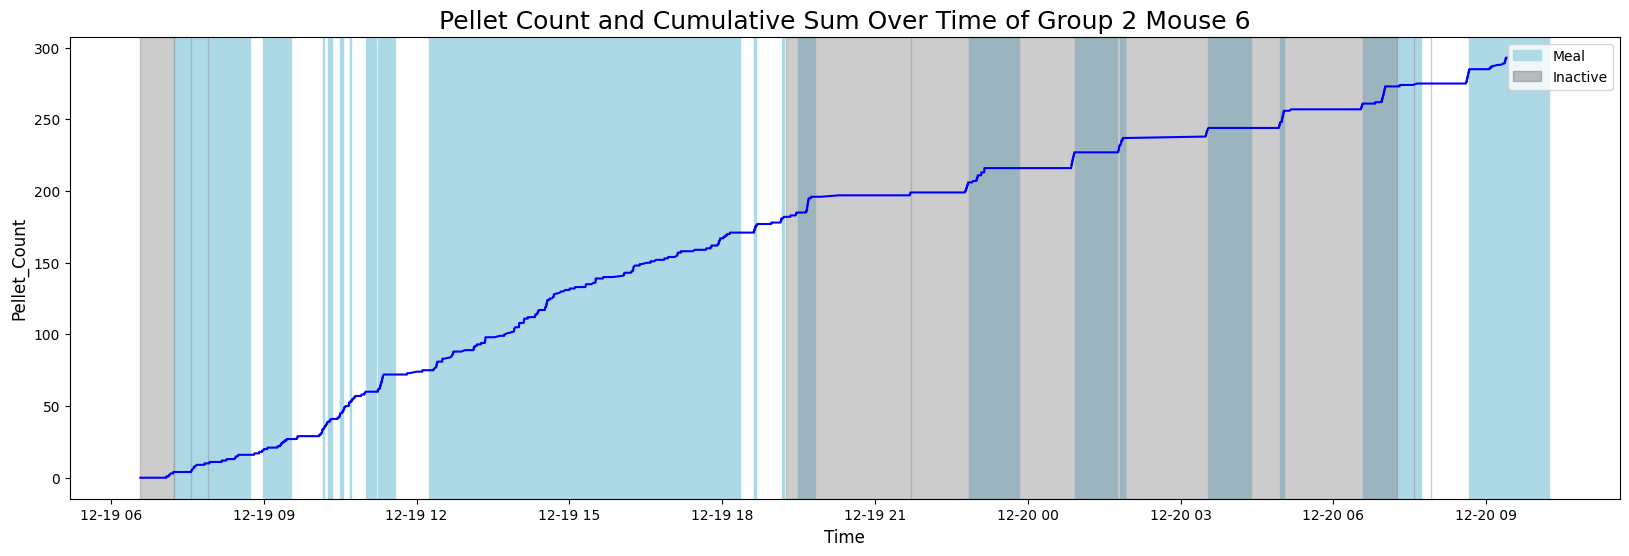

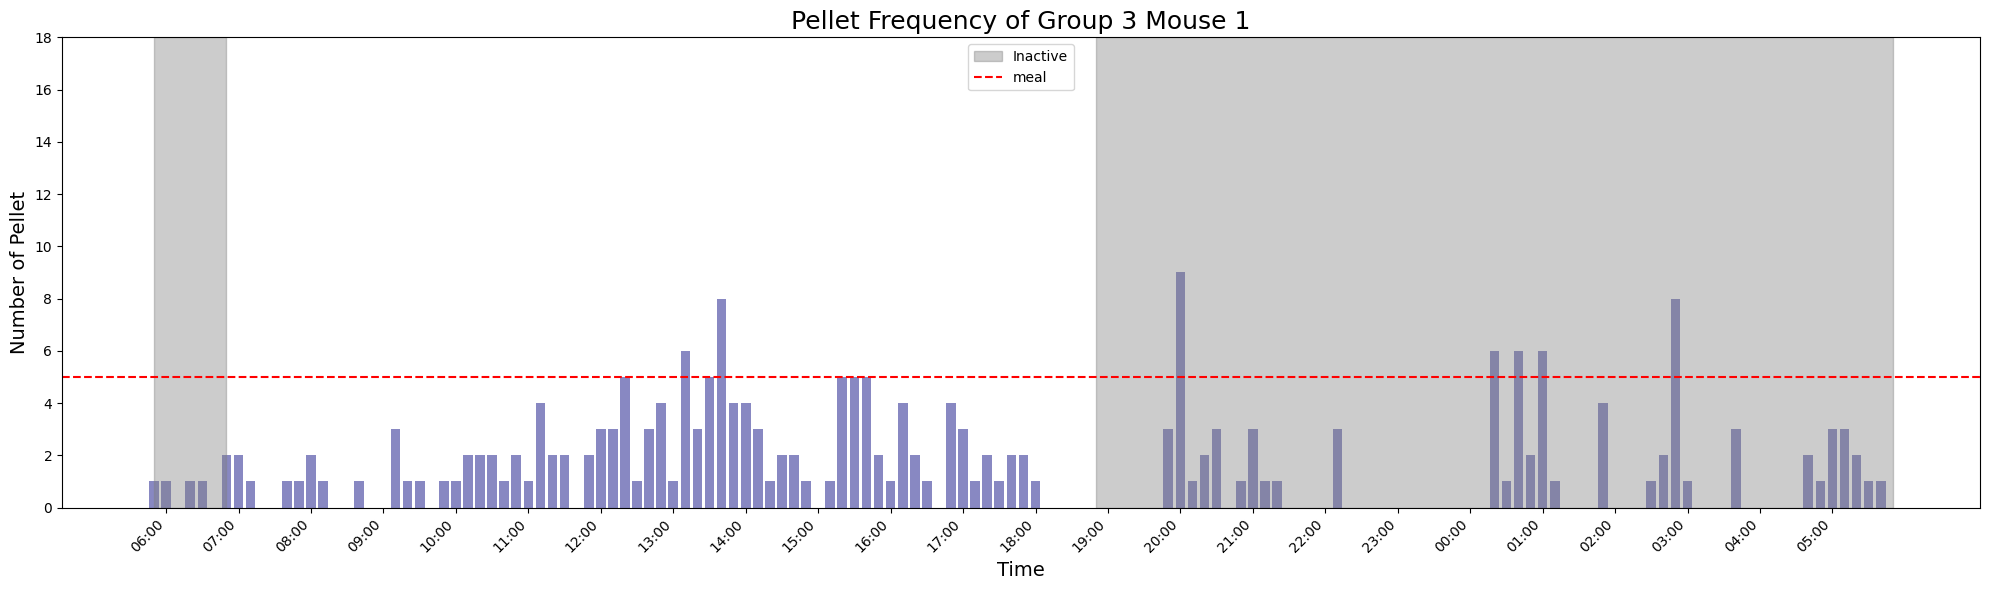

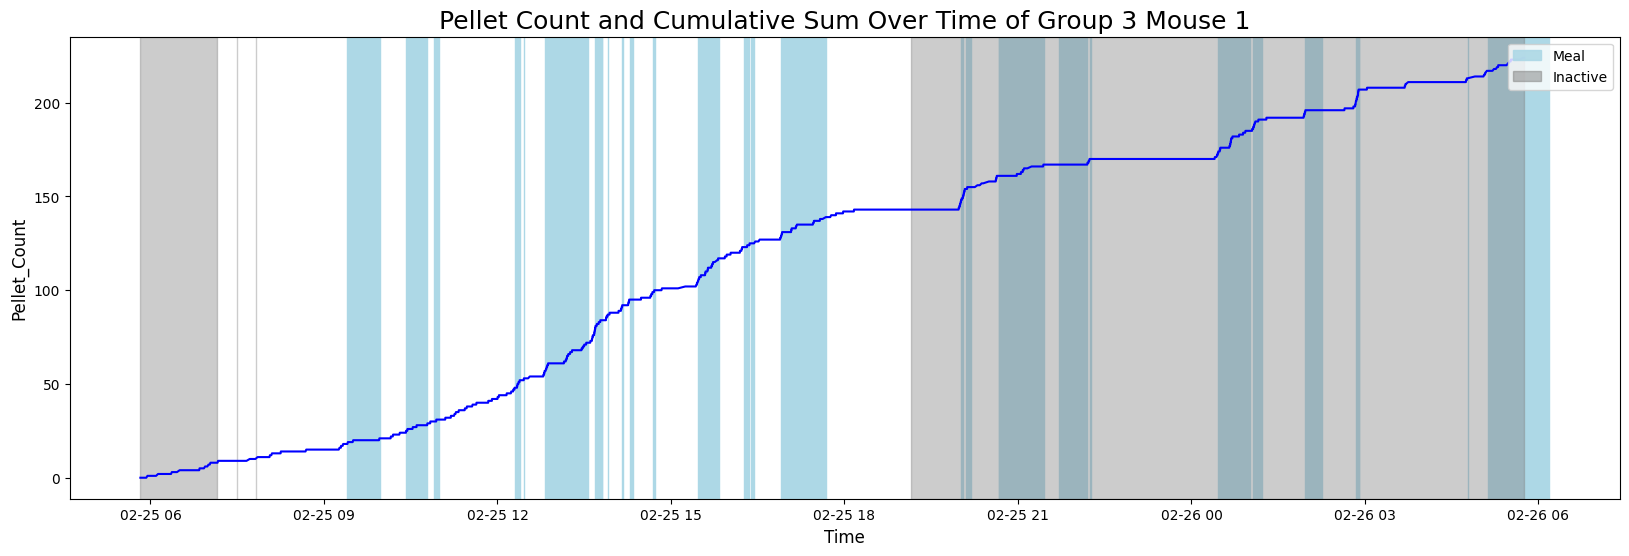

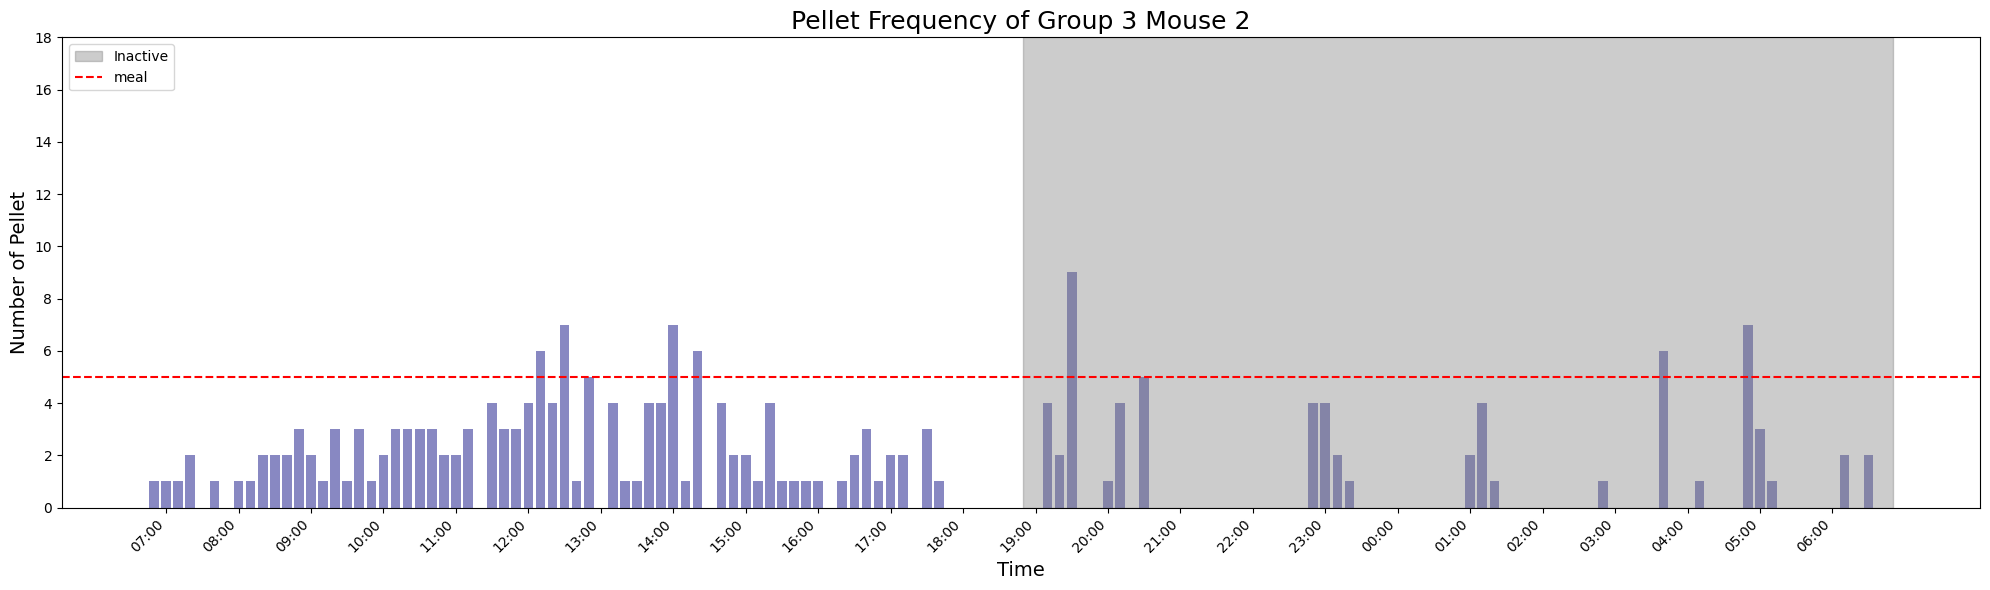

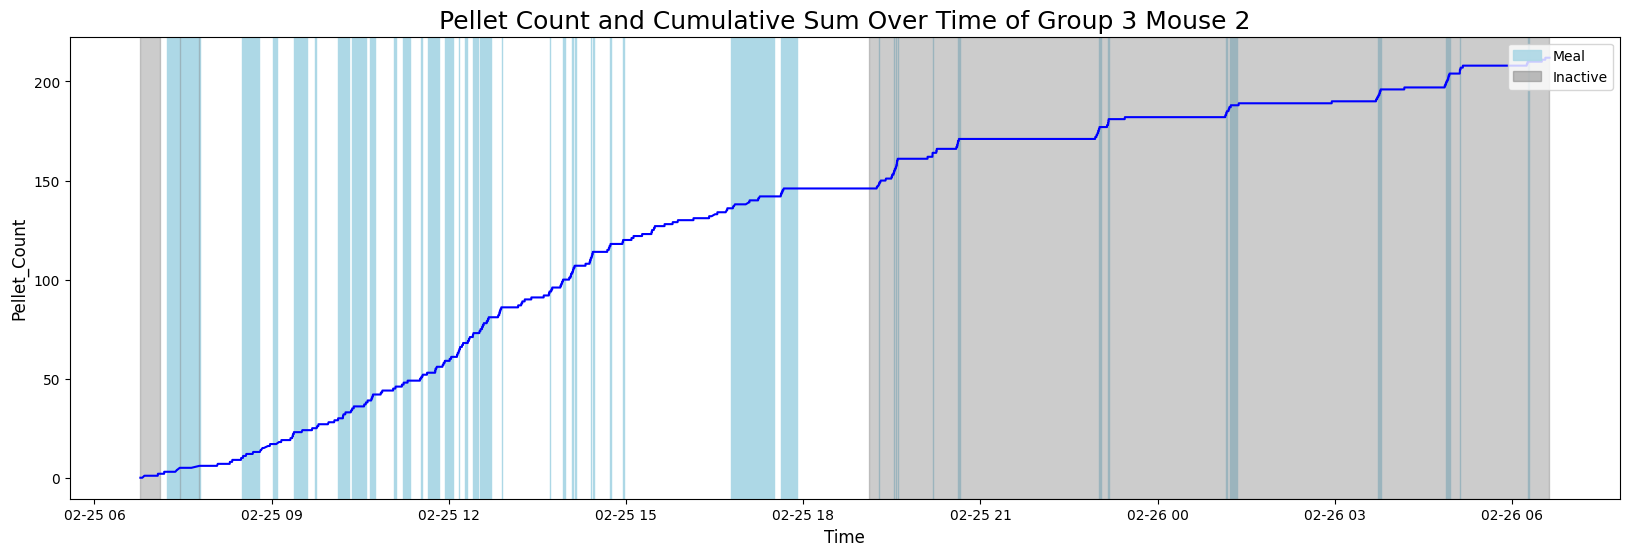

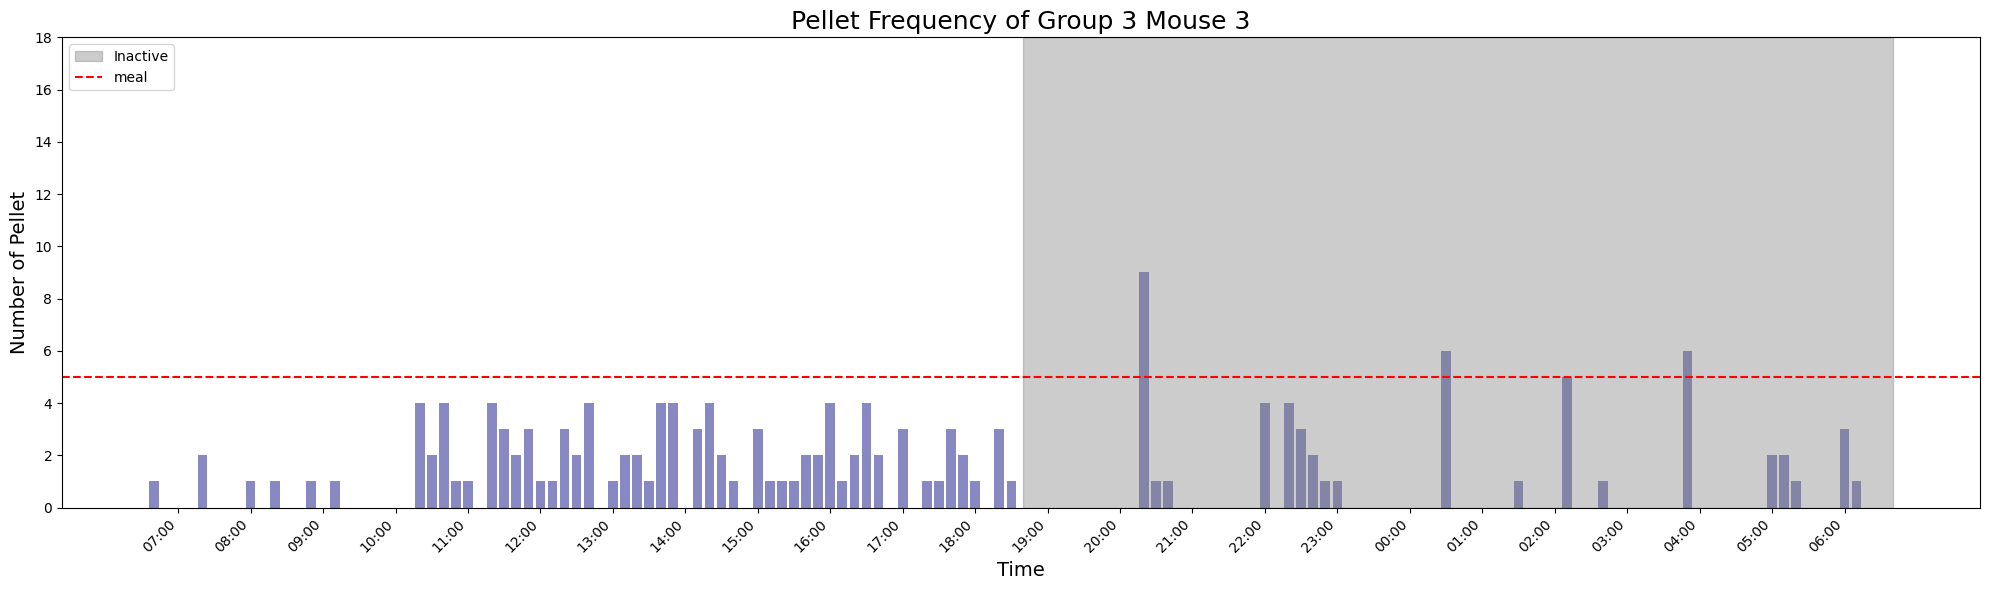

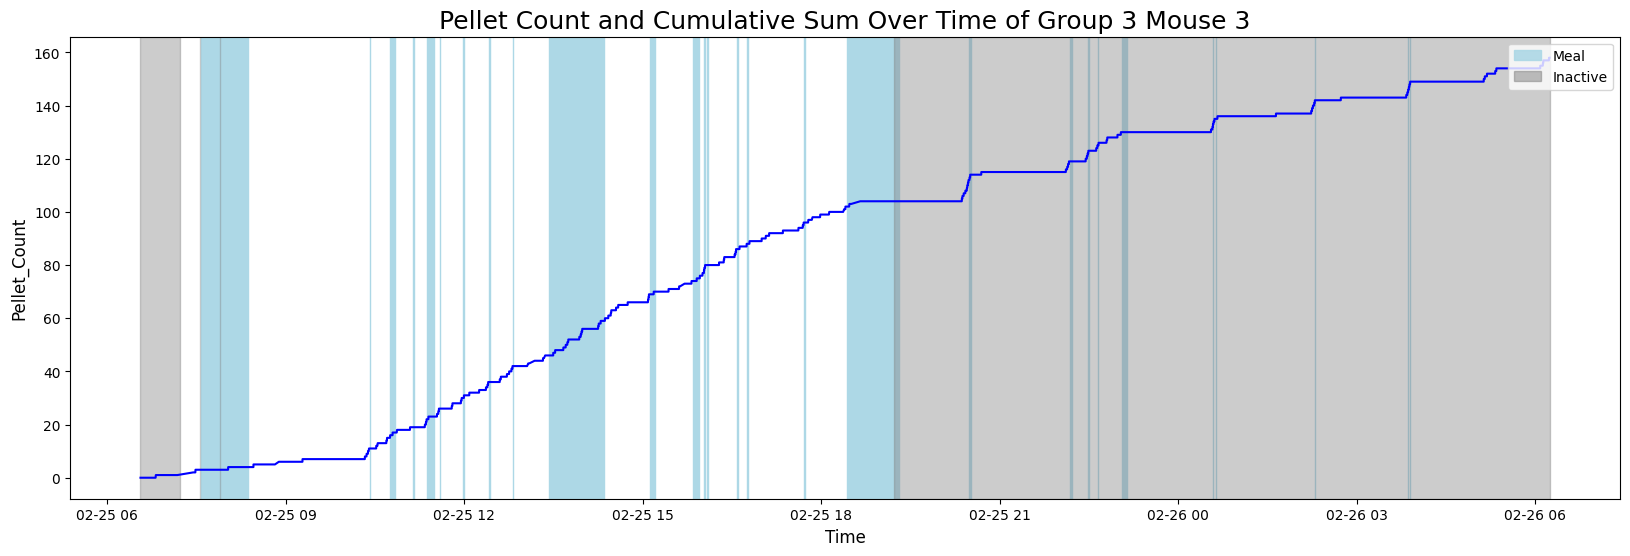

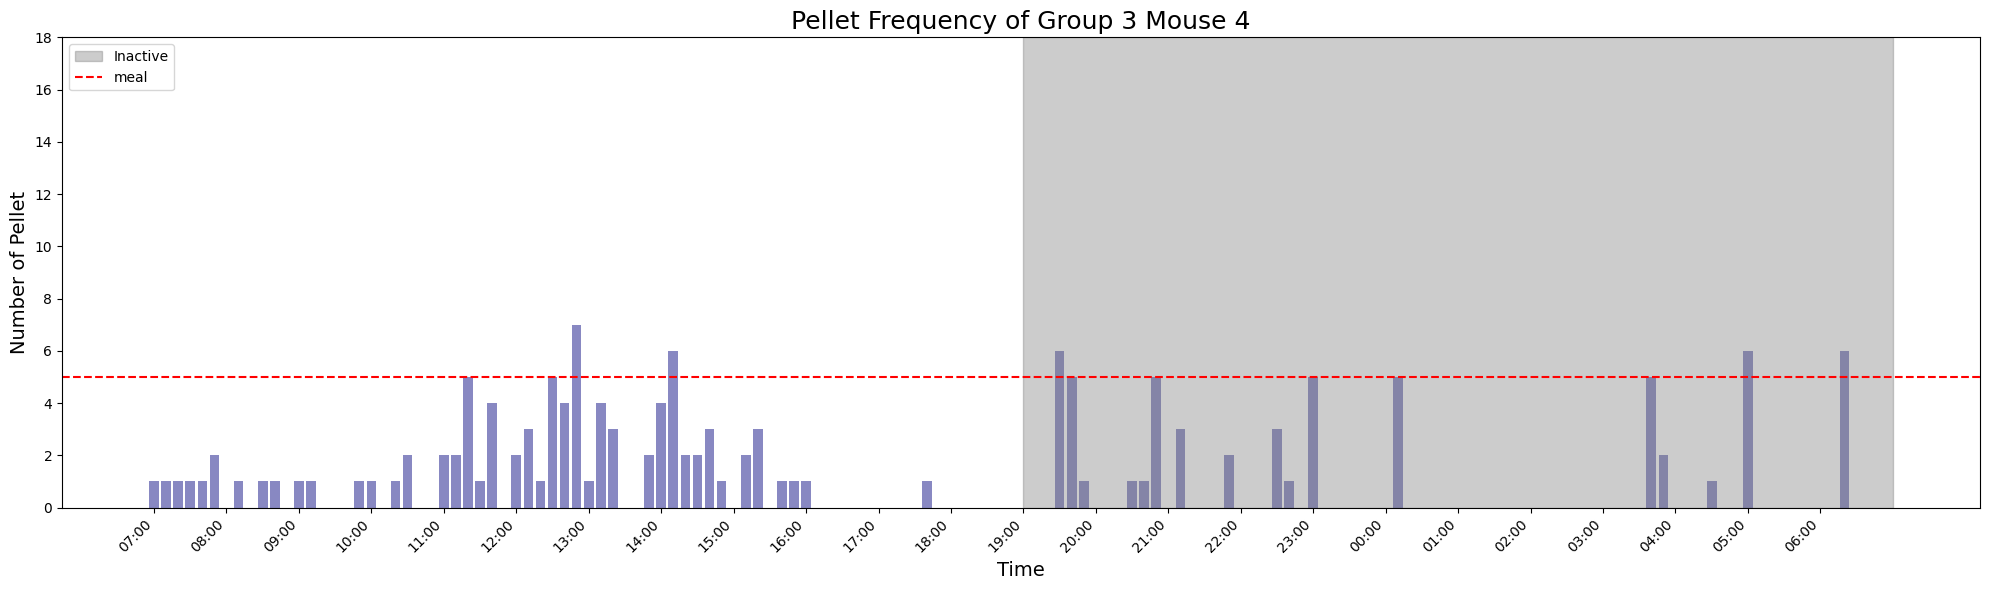

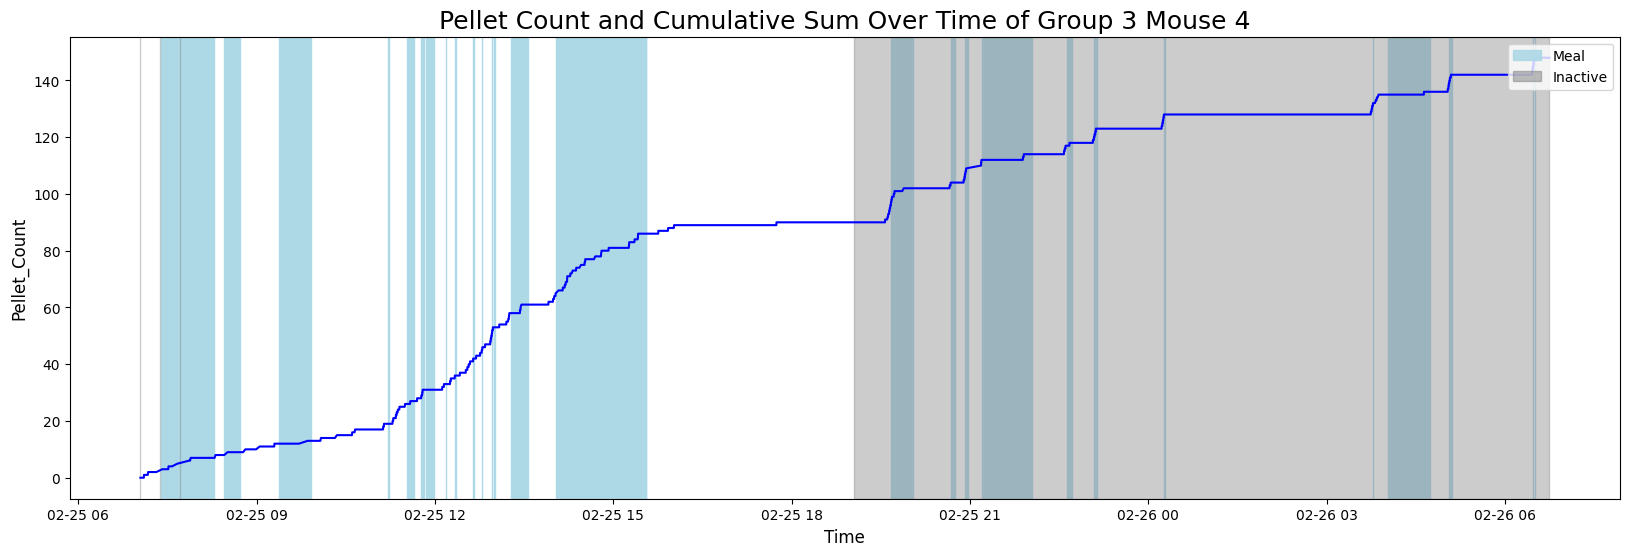

In [6]:
for sheet in fr1_female_sheets:
    metrics = process_meal_data(sheet, fr1_female_path, is_cask=False, 
                                   export_root=export_root)
    
    female_avg_pellet.append(metrics['avg_pellet'])
    female_dark_meals.append(metrics['dark_meals'])
    female_fir_meal.append(metrics['fir_meal'])
    female_fir_good_meal.append(metrics['fir_good_meal'])
    flip_female_meal_count.append(metrics['meal_count'])
    female_in_meal_ratio.append(metrics['in_meal_ratio'])

Female Size: 17
Female Average: 209.301
Female SE: 8.302


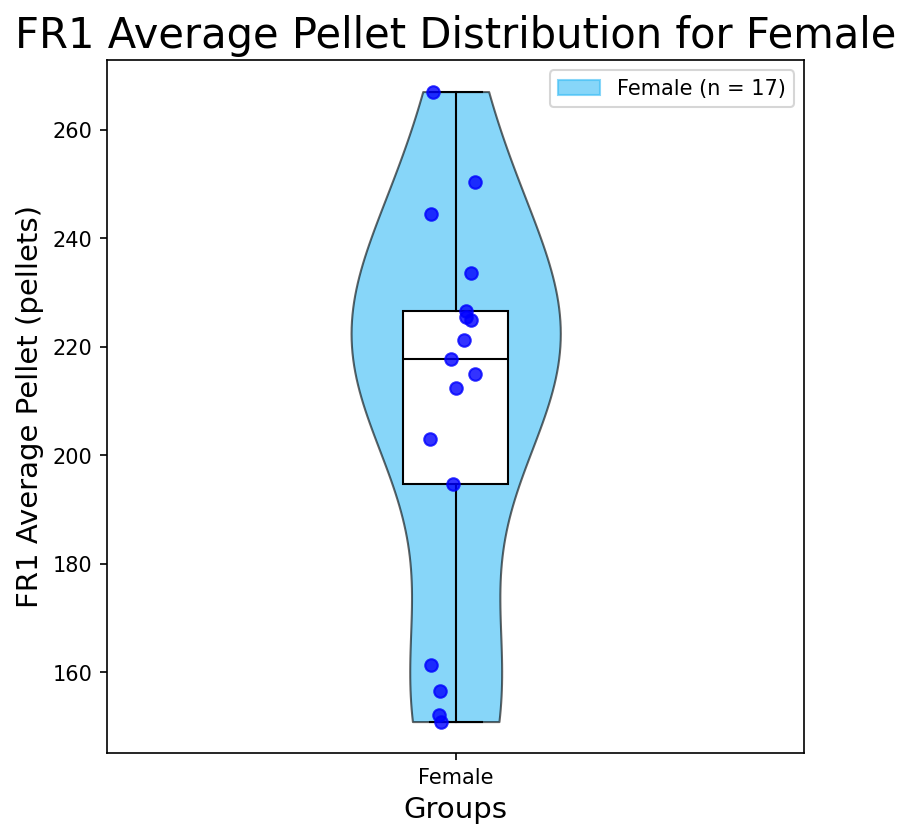

In [7]:
graph_single_stats(female_avg_pellet, stats_name='FR1 Average Pellet', unit='pellets', group_name='Female',
                    violin_width=0.3, export_path=os.path.join(export_root, '..', 'WT_FR1_pellet counts.svg'))

#### Time needed to start the first meal

Female Size: 17
Female Average: 1.949
Female SE: 0.257


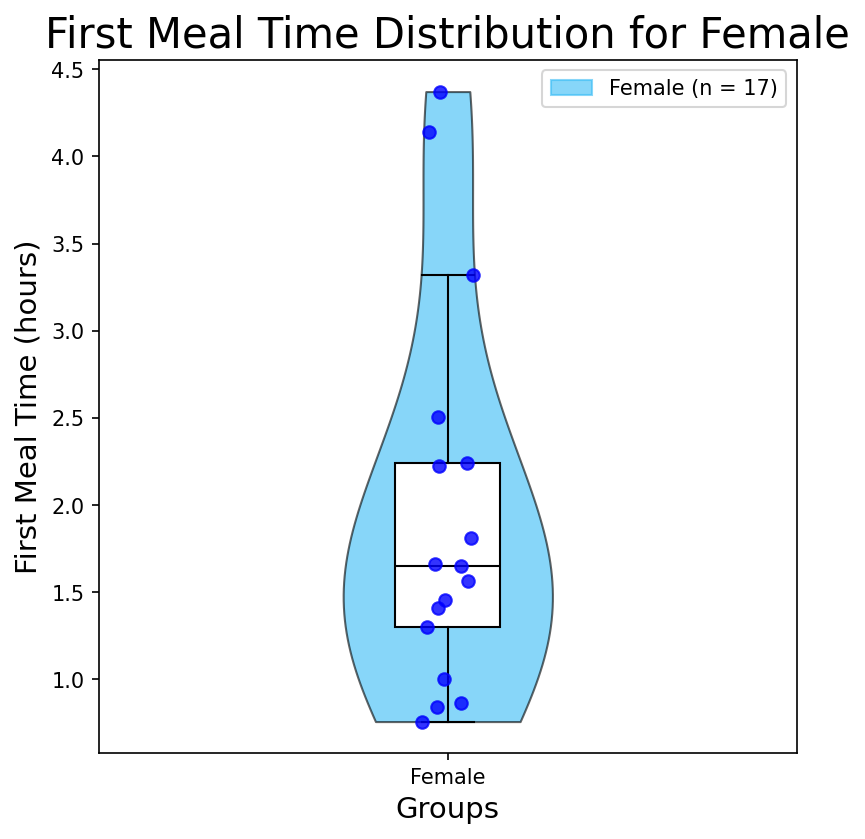

In [8]:
graph_single_stats(female_fir_meal, stats_name='First Meal Time', unit='hours', group_name='Female',
                  violin_width=0.3, export_path=os.path.join(export_root, '..', 'WT_1stMealTime.svg'))

Female Size: 17
Female Average: 2.682
Female SE: 0.277


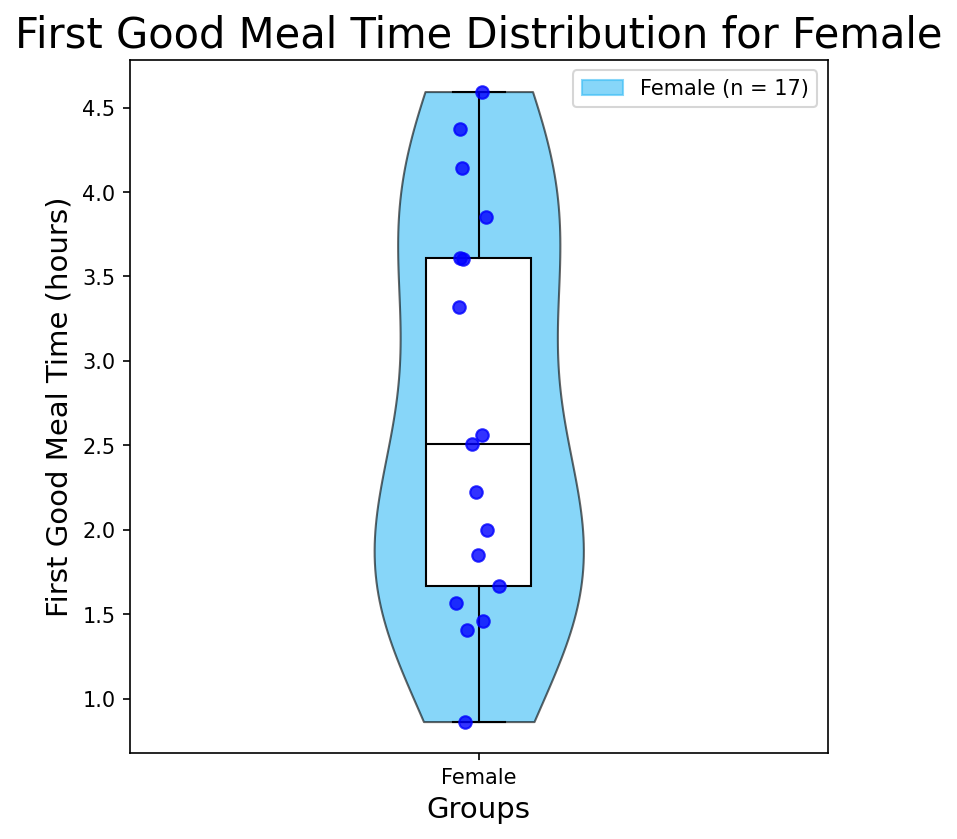

In [9]:
graph_single_stats(female_fir_good_meal, stats_name='First Good Meal Time', unit='hours', group_name='Female',
                  violin_width=0.3, export_path=os.path.join(export_root, '..', 'WT_1stGoodMealTime.svg'))

In [10]:
np.mean(female_in_meal_ratio), np.std(female_in_meal_ratio) / np.sqrt(len(female_in_meal_ratio))

(0.6008597441723796, 0.021202563597271754)